In [1]:
# Input info
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/fate_correlation/scrap2/minC5_corr.Kendall.b/"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
#se_cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.init_knnRes.30_objs_standard/aggregate/annotation/se_cells_meta.tsv"
#outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var/variants.init_knnRes.30_objs_standard/aggregate/annotation/clone_lineage/fate_correlation/scrap/minC5_corr.Kendall.b/"

use_input = False
min_cell = 5
input_col = "Input"
corr_method = "kendall_b"
rm_zero = True

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import colorcet as cc
%matplotlib inline
import numpy as np
from mplh.fig_utils import helper_save as hs

fig_utils from mplh


In [3]:
sns.set(font_scale = 1.3)


In [4]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [5]:
def get_clone_count(x, clone_counts):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]


In [6]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)

se_cells_meta["nuclear_clusters"] = se_cells_meta["nuclear_clusters"].astype(object).astype(str)
palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))
hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}

### Remove None before normalizing
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Flt3l_AAACGAAGTCTGATTG-1,Flt3l,4239,4239,15047,1940,50,52,636,4173,8196,...,6,5280,4119,AAACGAAGTCTGATTG-1_Flt3l,Flt3l_AAACGAAGTCTGATTG-1,2,0,Flt3l,0_2,HSPC 3
Flt3l_AAACTCGGTAGGTCTT-1,Flt3l,2925,2925,13052,1674,43,26,526,4014,6769,...,3,4538,3532,AAACTCGGTAGGTCTT-1_Flt3l,Flt3l_AAACTCGGTAGGTCTT-1,16,1,Flt3l,1_16,Erythroid
Flt3l_AAAGGGCAGACTTCCA-1,Flt3l,3562,3562,14297,2199,46,34,695,3497,7826,...,4,4653,3642,AAAGGGCAGACTTCCA-1_Flt3l,Flt3l_AAAGGGCAGACTTCCA-1,13,0,Flt3l,0_13,Classical Monocyte
Flt3l_AAATGAGGTATCCTTT-1,Flt3l,4915,4915,16671,2497,75,62,760,2906,10371,...,9,6459,4673,AAATGAGGTATCCTTT-1_Flt3l,Flt3l_AAATGAGGTATCCTTT-1,18,0,Flt3l,0_18,Non-classical monocyte
Flt3l_AAATGCCGTGATAAGT-1,Flt3l,3886,3886,15323,2276,44,49,723,3740,8491,...,4,5109,3980,AAATGCCGTGATAAGT-1_Flt3l,Flt3l_AAATGCCGTGATAAGT-1,6,0,Flt3l,0_6,Classical Monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1,HPSC 1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27,MkP
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19,HPSC 1
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2,Erythroid


In [7]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1, args=(clone_counts,))),axis=1).fillna(0)

log2_clone_counts_df = clone_counts_df.copy()
log2_clone_counts_df[hue_order] = np.log2(1+log2_clone_counts_df[hue_order])
log2_clone_counts_df



,donor,ncells,Classical Monocyte,Erythroid,Granulocyte,HPSC 1,HPSC 2,HSPC 3,HSPC 4,MkP,Neutrophil,Non-classical monocyte,pDC,pre-B cells
name,,,,,,,,,,,,,,
0_0,0,429,3.906891,3.700440,3.906891,7.357552,6.768184,4.169925,1.584963,4.754888,4.247928,1.000000,4.807355,4.807355
1_0,1,317,0.000000,3.906891,3.584963,6.209453,6.781360,5.209453,2.000000,5.426265,3.321928,1.000000,3.807355,2.807355
0_1,0,268,3.000000,2.584963,3.000000,6.727920,6.169925,3.321928,0.000000,4.700440,2.807355,1.584963,3.459432,4.459432
0_2,0,230,2.000000,3.321928,3.321928,6.507795,5.906891,3.000000,1.000000,4.459432,2.807355,3.169925,3.584963,2.807355
1_1,1,196,2.584963,2.000000,2.000000,5.977280,5.906891,4.523562,0.000000,4.807355,3.321928,0.000000,2.584963,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_34,0,23,0.000000,1.000000,0.000000,3.169925,3.169925,1.000000,0.000000,1.000000,0.000000,1.584963,1.000000,1.000000
1_23,1,22,0.000000,0.000000,0.000000,2.584963,3.321928,2.584963,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
0_35,0,21,0.000000,1.000000,1.000000,2.807355,3.169925,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000


## Fate correlation

In [8]:
## Get top, middle, and bottom 2 correlations - Conditions combined

def repr_vals(x, n=2):
    """Get top, middle, and bottom 2 correlations - Conditions combined
    
    Assumes values are sorted
    """
    x_len = len(x)
    top = x[:min(len(x),n)]
    bot = []
    if x_len >= n*2:
        bot = x[::-1][:n]
        mid = []
        if x_len >= n*3:
            mid = x[int((len(x)/2)-(n/2)): int((len(x)/2)+(n/2))]
    return np.concatenate((top, bot, mid))


def top_vals(x, n=5):
    """Assumes values are sorted"""
    x_len = len(x)
    return x[:min(len(x),n)]


def repr_df(corr_vals, all_corr_df):
    repr_corr = all_corr_df.isin(corr_vals)
    repr_corr_inds = repr_corr[repr_corr > 0].stack().index.tolist()
    repr_corr_inds_df = pd.DataFrame(repr_corr_inds)
    print(repr_corr_inds_df.head())
    repr_corr_inds_df["nm"] = repr_corr_inds_df.apply(lambda x: "-MERGE-".join(np.sort(x.values)), axis=1)

    repr_corr_inds_df = repr_corr_inds_df.loc[~(repr_corr_inds_df.duplicated(subset=["nm"]))].drop("nm", axis=1)
    repr_corr_inds_df["spearman corr"] = repr_corr_inds_df.apply(lambda x: all_corr_df.loc[x[0], x[1]], axis=1)
    repr_corr_inds_df = repr_corr_inds_df.sort_values("spearman corr")[::-1]
    return repr_corr_inds_df

def corr_df_flatten(df):
    vals = np.sort(list(set(df.values.flatten())))[::-1]
    return vals[vals!=1] # remove the diagonals

def plot_repr_corr(df, all_corr_df, label, top=False, out_f=None):
    vals = corr_df_flatten(all_corr_df)
    if top:
        corr_vals = top_vals(vals, n=5) #top, middle, and bottom n correlations
    else:
        corr_vals = repr_vals(vals, n=2) #top, middle, and bottom n correlations
    repr_corr_inds_df = repr_df(corr_vals, all_corr_df)
    corr_cat_df = []
    for ind, val in repr_corr_inds_df.iterrows():
        curr = df.loc[:,[val[0], val[1]]].copy()
        curr["comp"] = f'{"__".join(curr.columns)} ({corr_method} r={val["spearman corr"]:.3f})'
        curr = curr.rename({val:str(ind) for ind, val in enumerate([val[0], val[1]])}, axis=1)
        corr_cat_df.append(curr)
        
    g = sns.lmplot(data=pd.concat(corr_cat_df,axis=0), x="0", y="1", hue="comp", height=12);
    plt.ylabel(label)
    plt.xlabel(label)
    plt.suptitle("Top, middle, and bottom 2 paired correlations")
    if top:
        plt.suptitle(f"Top 5 paired correlations")
    if out_f is not None:
        hs(out_f, to_pdf=True)
    return corr_cat_df

In [9]:
from scipy.stats import kendalltau
def kendalltau_b(x,y):
    #print('kendall', kendalltau(x, y, variant='b'))
    return kendalltau(x, y, variant='b')[0]

def get_corr(df, corr_method):
    df = df.copy().drop(["ncells", "donor"],axis=1, errors='ignore')
    if corr_method == "spearman":
        return df.corr(method="spearman")
    elif corr_method == "kendall_b":
        return df.corr(method=kendalltau_b)



### a) Donors in sequenced run combined (min_cell)

In [11]:
clone_counts_df

,donor,ncells,Classical Monocyte,Erythroid,Granulocyte,HPSC 1,HPSC 2,HSPC 3,HSPC 4,MkP,Neutrophil,Non-classical monocyte,pDC,pre-B cells
name,,,,,,,,,,,,,,
0_0,0,429,14.0,12.0,14.0,163.0,108.0,17.0,2.0,26.0,18.0,1.0,27.0,27.0
1_0,1,317,0.0,14.0,11.0,73.0,109.0,36.0,3.0,42.0,9.0,1.0,13.0,6.0
0_1,0,268,7.0,5.0,7.0,105.0,71.0,9.0,0.0,25.0,6.0,2.0,10.0,21.0
0_2,0,230,3.0,9.0,9.0,90.0,59.0,7.0,1.0,21.0,6.0,8.0,11.0,6.0
1_1,1,196,5.0,3.0,3.0,62.0,59.0,22.0,0.0,27.0,9.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_34,0,23,0.0,1.0,0.0,8.0,8.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0
1_23,1,22,0.0,0.0,0.0,5.0,9.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0
0_35,0,21,0.0,1.0,1.0,6.0,8.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0


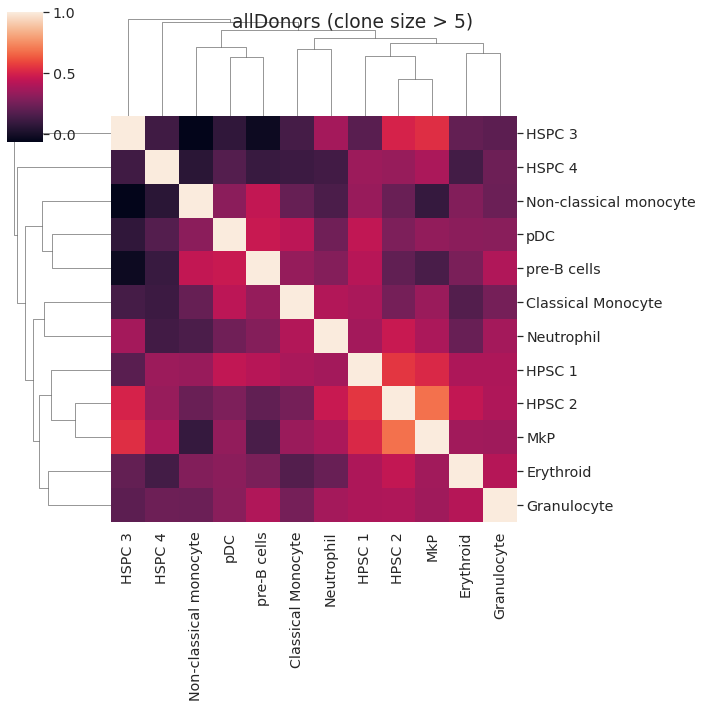

In [10]:
filt_clone_counts_df = keep_top_clones(clone_counts_df, min_cell=min_cell)

all_corr_df = get_corr(filt_clone_counts_df, corr_method)
# if corr_method == "spearman":
#     all_corr_df = np.log2(1+filt_clone_counts_df.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
# elif corr_method == "kendall_b":
#     all_corr_df = np.log2(1+filt_clone_counts_df.drop(["ncells", "donor"],axis=1)).corr(method=kendalltau_b)


all_corr_df
sns.clustermap(all_corr_df)
plt.suptitle(f"allDonors (clone size > {min_cell})")
hs(join(outdir, "fateCorr_allDonors.png"), to_pdf=True)

all_corr_df.to_csv(join(outdir, "correlation.csv"))

    0   1
0  10  13
1  10   2
2  10   9
3  13  10
4  13   7
    0   1
0   1  13
1   1   7
2  10  13
3  10   7
4  13   1


[                      0         1                       comp
 name                                                        
 cd34norm_3_0   2.000000  0.000000  13__7 (kendall_b r=0.754)
 cd34norm_1_0   1.000000  0.000000  13__7 (kendall_b r=0.754)
 CHIP_b1_0_1    3.321928  5.169925  13__7 (kendall_b r=0.754)
 cd34norm_0_0   0.000000  0.000000  13__7 (kendall_b r=0.754)
 CHIP_b1_1_2    4.906891  6.129283  13__7 (kendall_b r=0.754)
 ...                 ...       ...                        ...
 cd34norm_1_47  0.000000  0.000000  13__7 (kendall_b r=0.754)
 CHIP_a1_3_71   0.000000  0.000000  13__7 (kendall_b r=0.754)
 CHIP_b2_0_72   0.000000  0.000000  13__7 (kendall_b r=0.754)
 CHIP_a1_3_70   0.000000  0.000000  13__7 (kendall_b r=0.754)
 CHIP_a1_3_63   0.000000  0.000000  13__7 (kendall_b r=0.754)
 
 [471 rows x 3 columns],
                       0         1                        comp
 name                                                         
 cd34norm_3_0   2.321928  2.000000  10__1

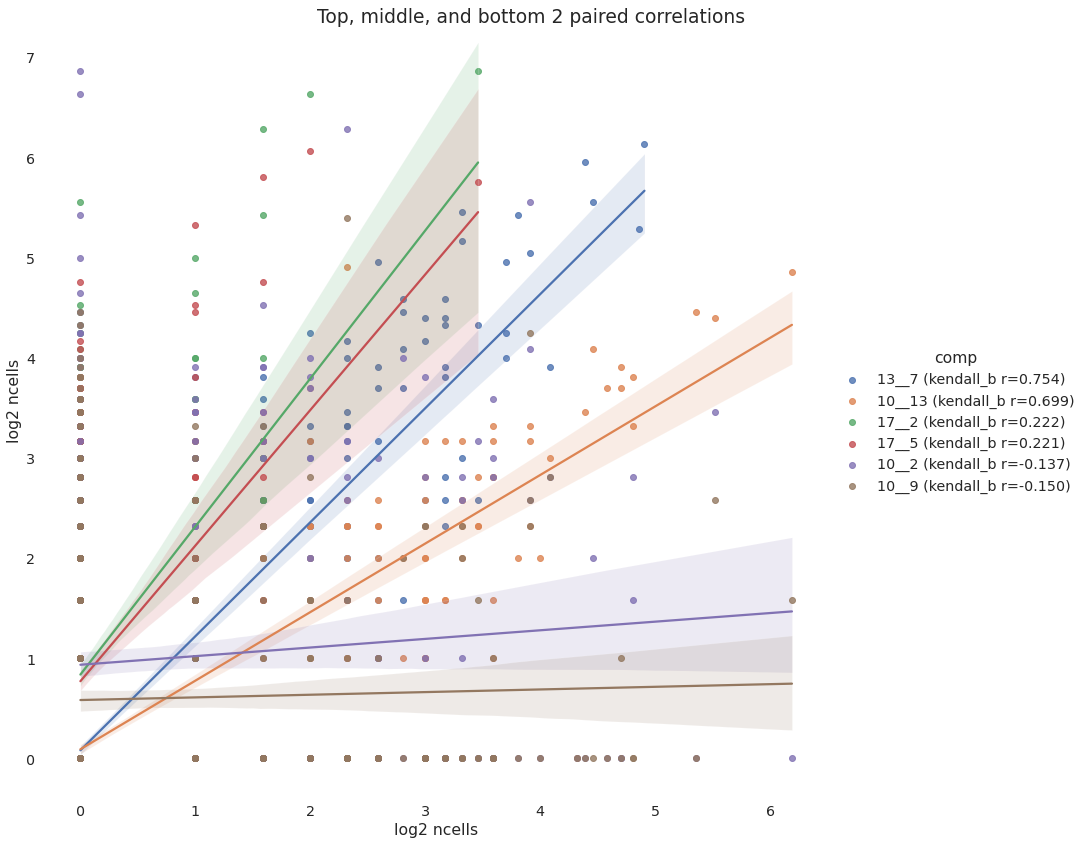

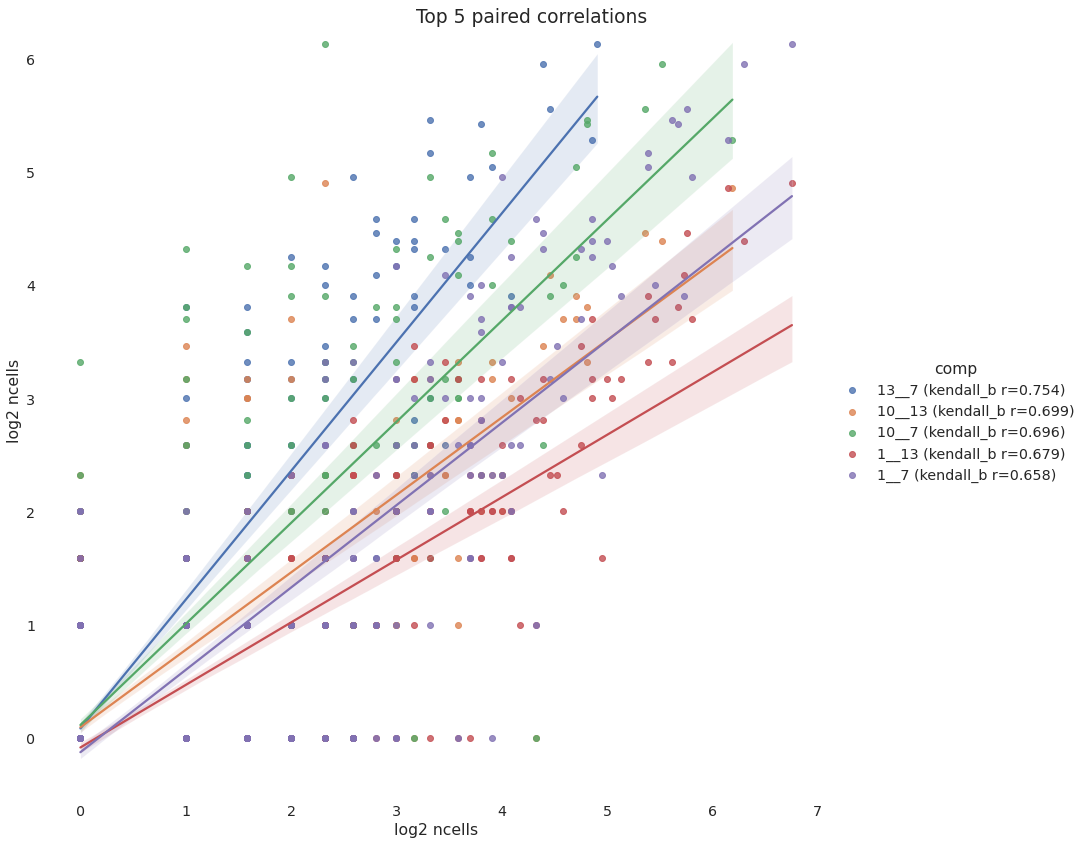

In [11]:
plot_repr_corr(log2_clone_counts_df, all_corr_df, label="log2 ncells", 
               out_f=join(outdir,"fateCorr_scatter_allDonors.png"))

plot_repr_corr(log2_clone_counts_df, all_corr_df, label="log2 ncells", top=True,
               out_f=join(outdir,"top_fateCorr_scatter_allDonors.png"))

### b) Separate donors, min_cell=min_cell

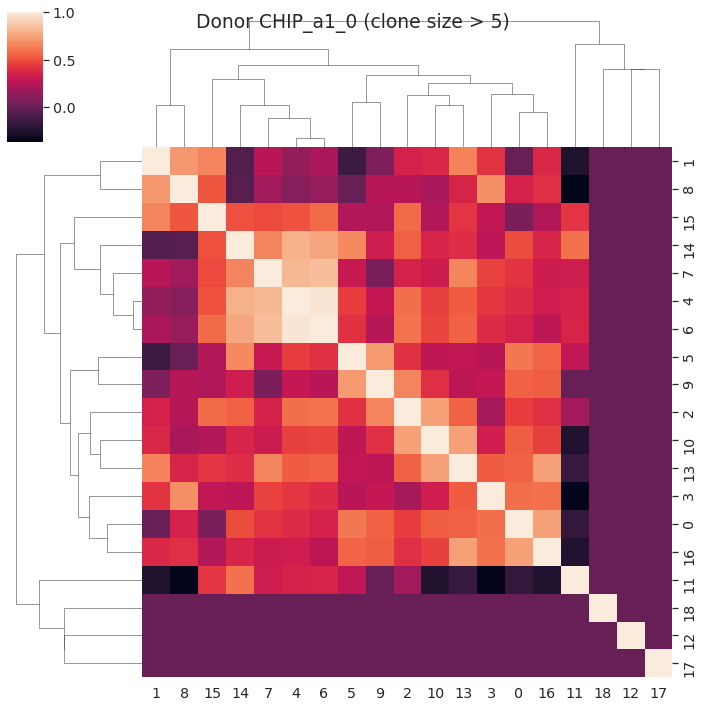

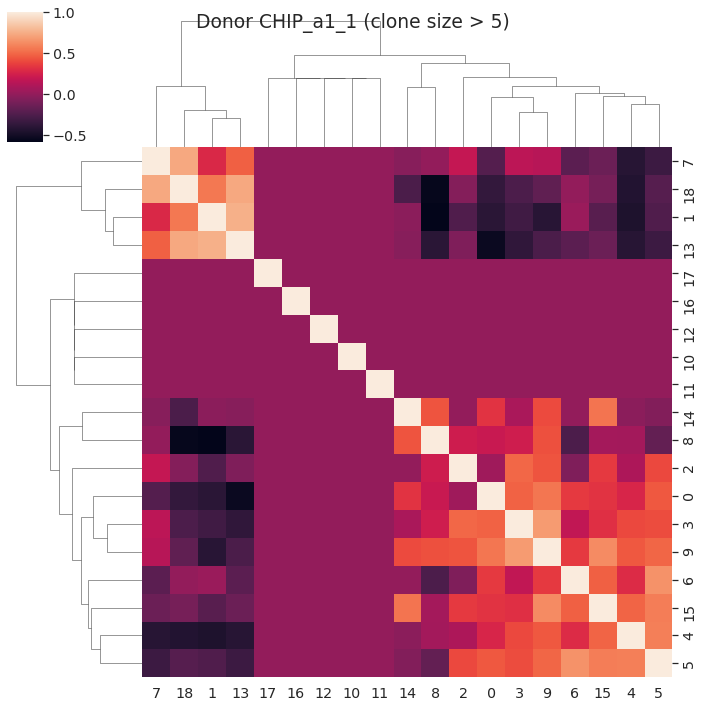

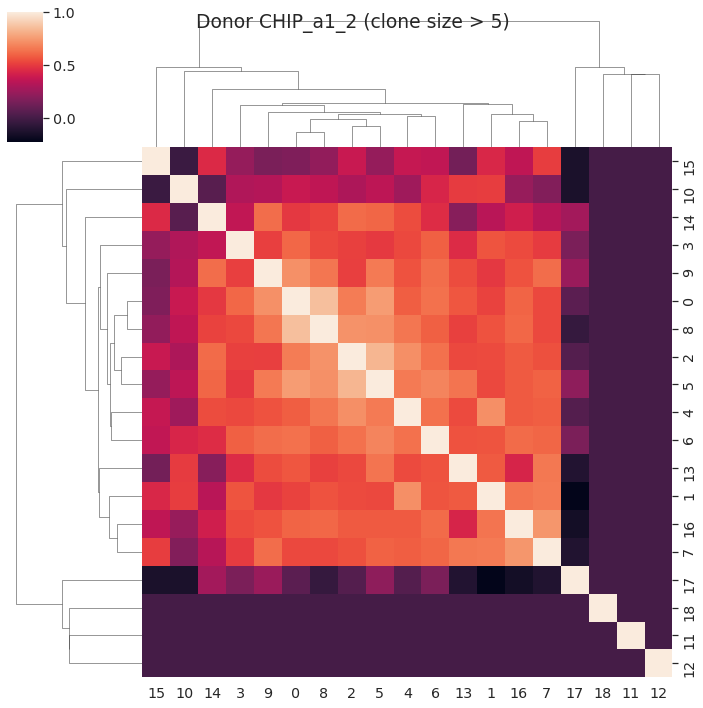

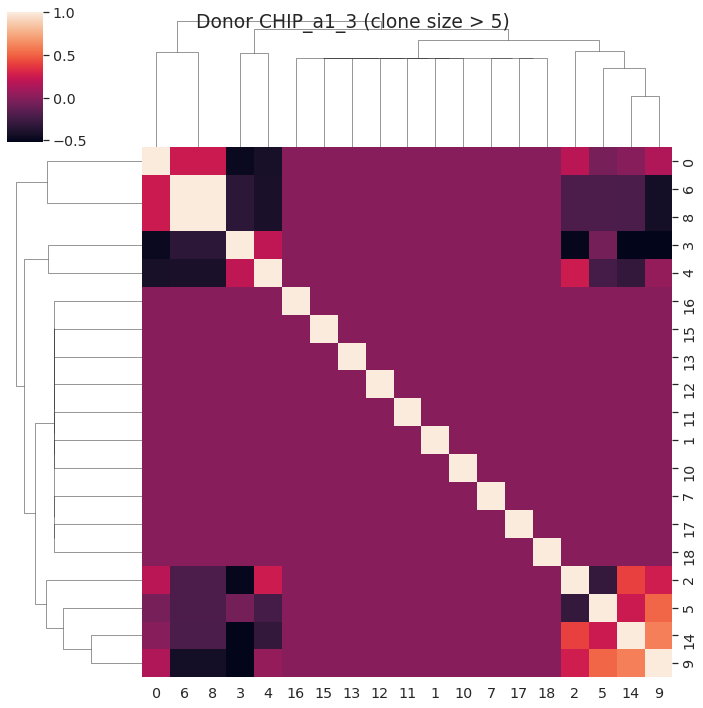

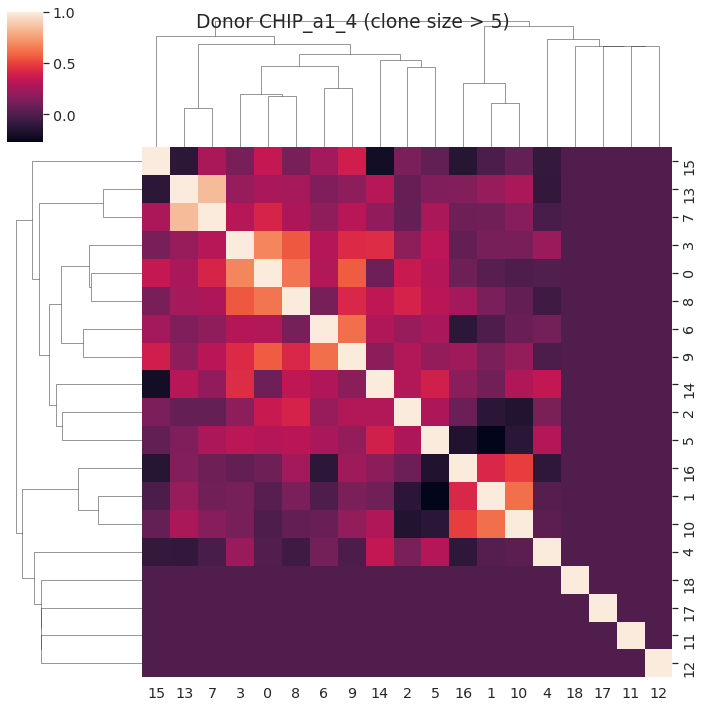

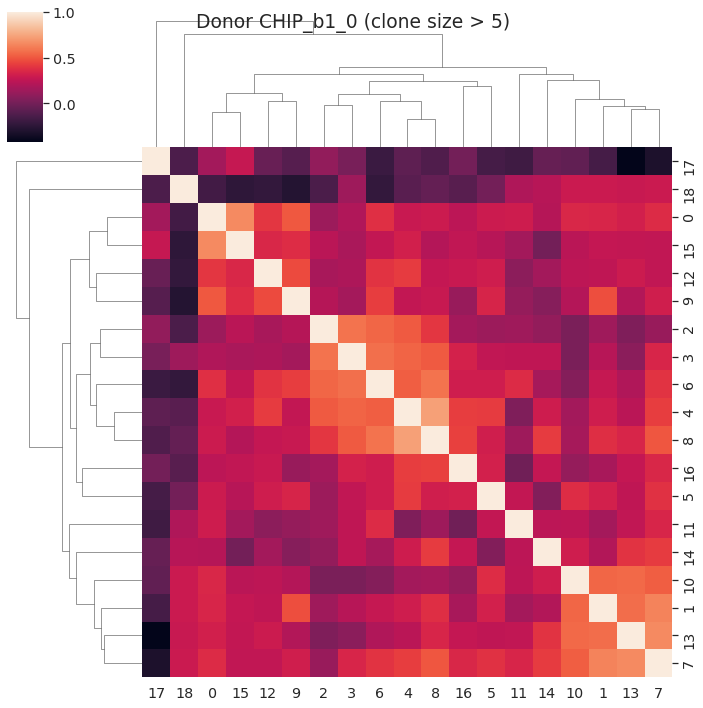

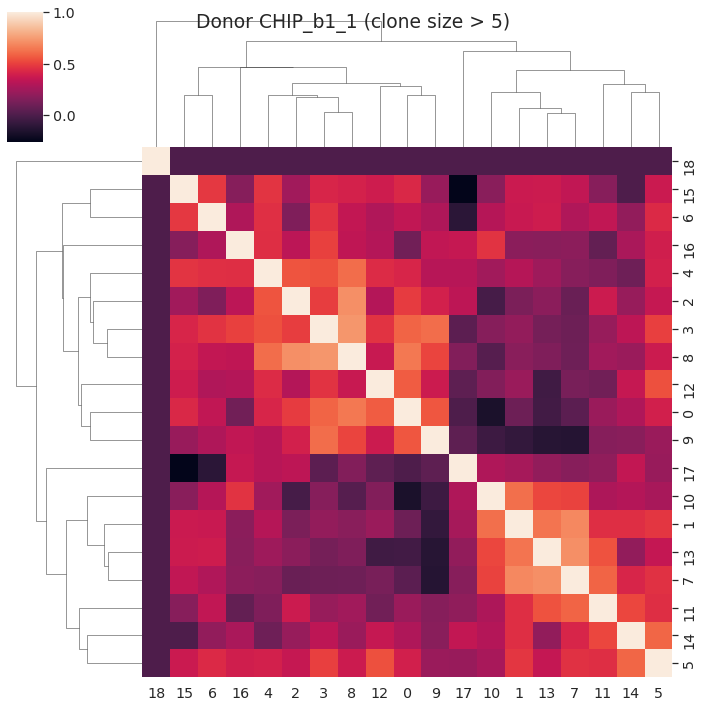

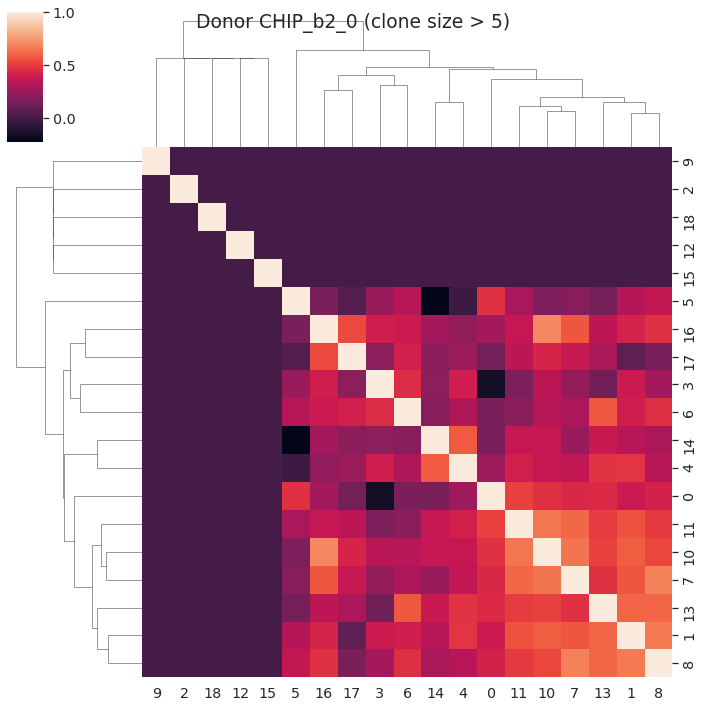

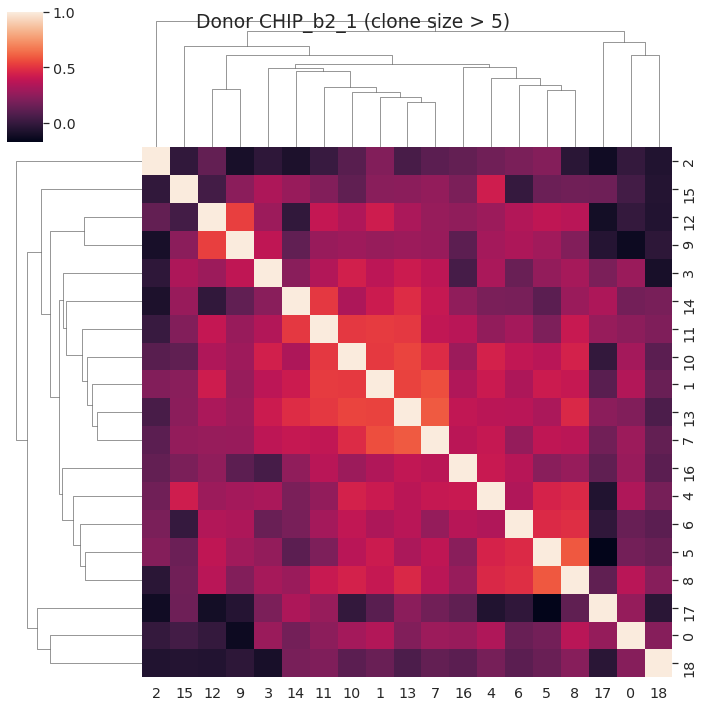

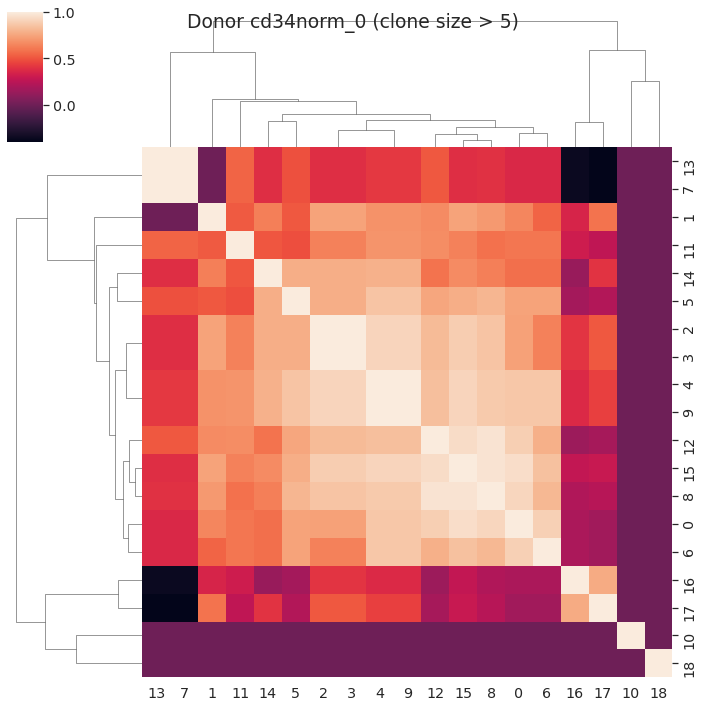

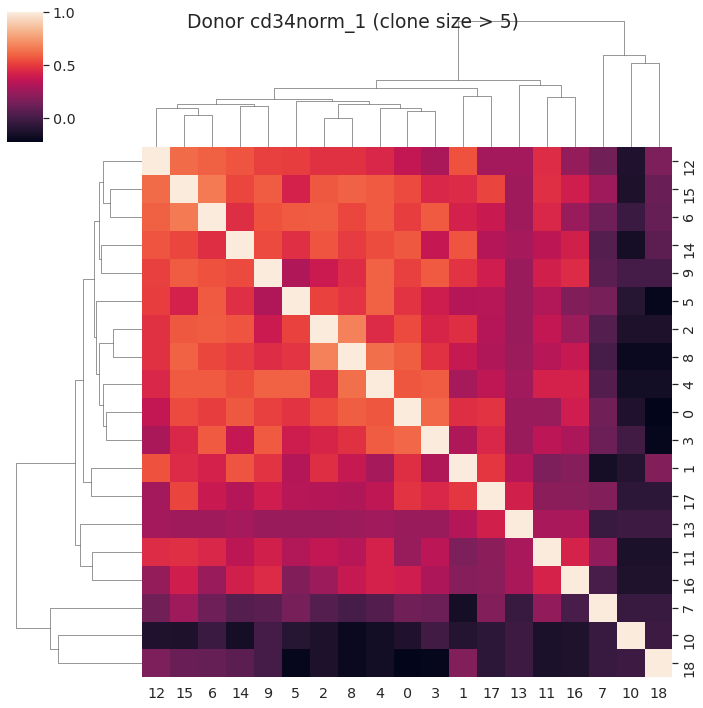

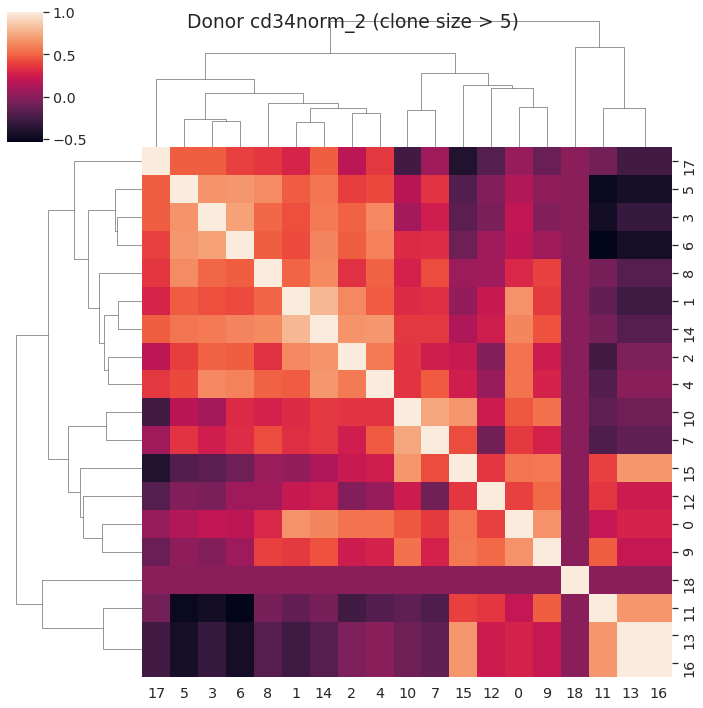

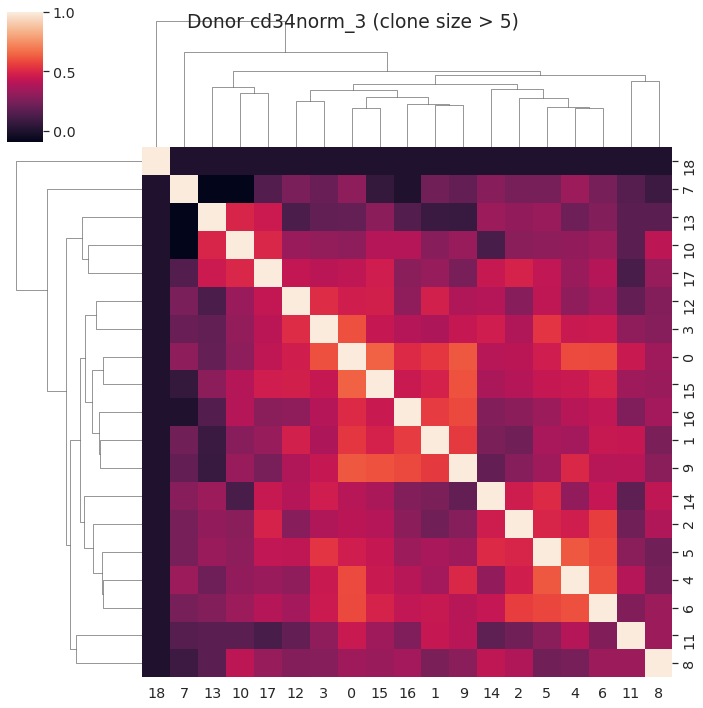

In [14]:
for don, val in clone_counts_df.groupby("donor"):
    tmp = keep_top_clones(val, min_cell=min_cell)
    #corr_df = np.log2(1+tmp.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
    corr_df = get_corr(tmp, corr_method).fillna(0)
    corr_df

    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} (clone size > {min_cell})")
    hs(join(outdir, f"fateCorr_donor{don}.png"), to_pdf=True)


### c) Separate donors, min_cell is 50

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:709: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:717: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


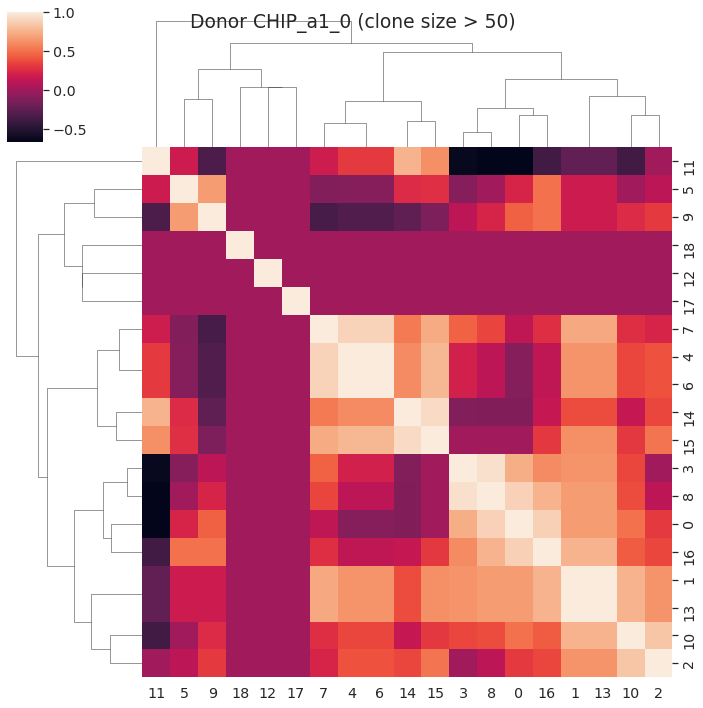

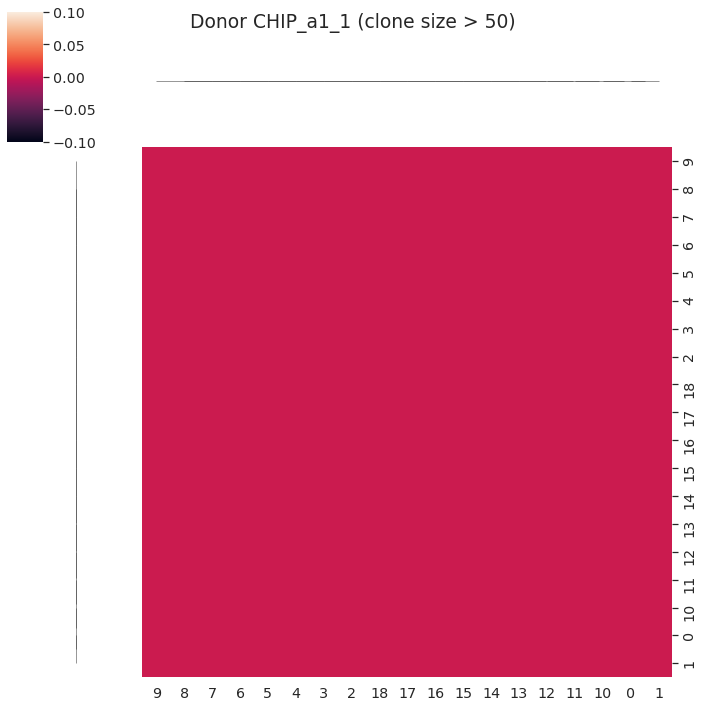

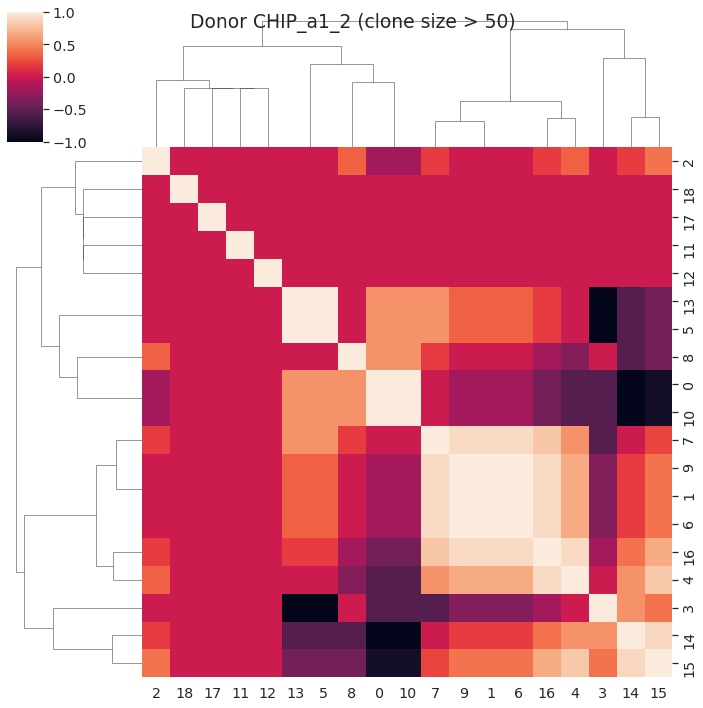

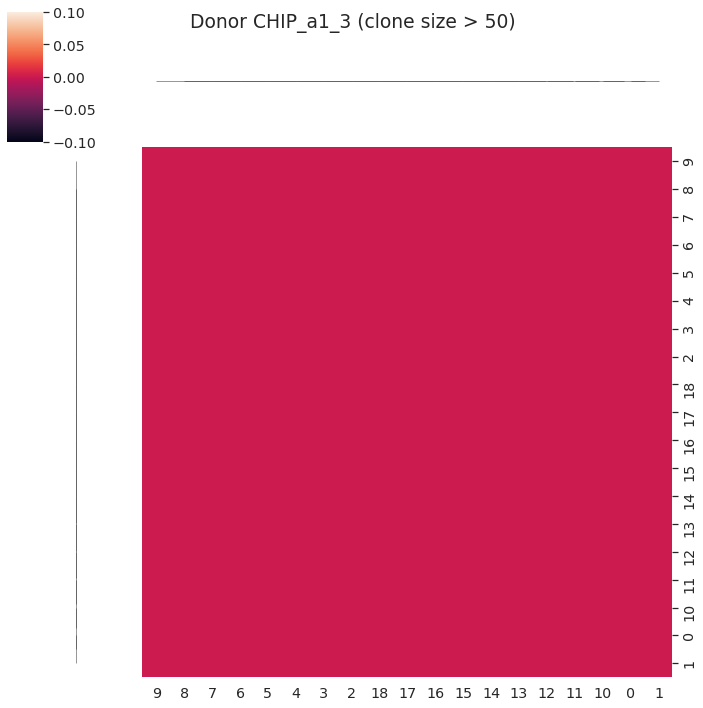

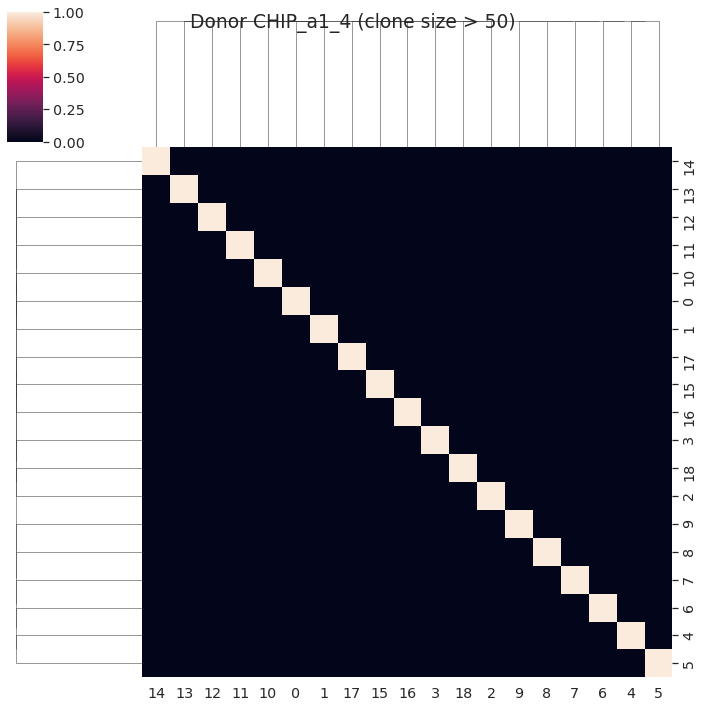

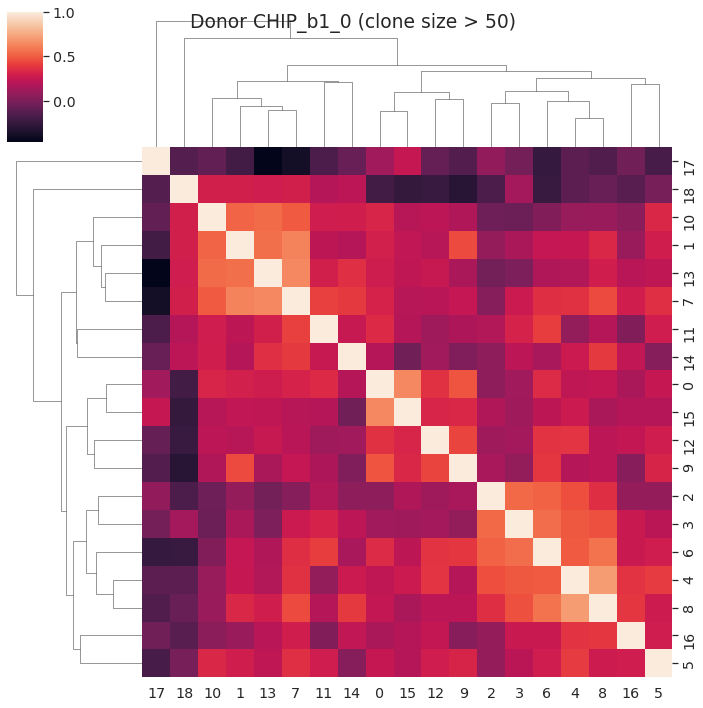

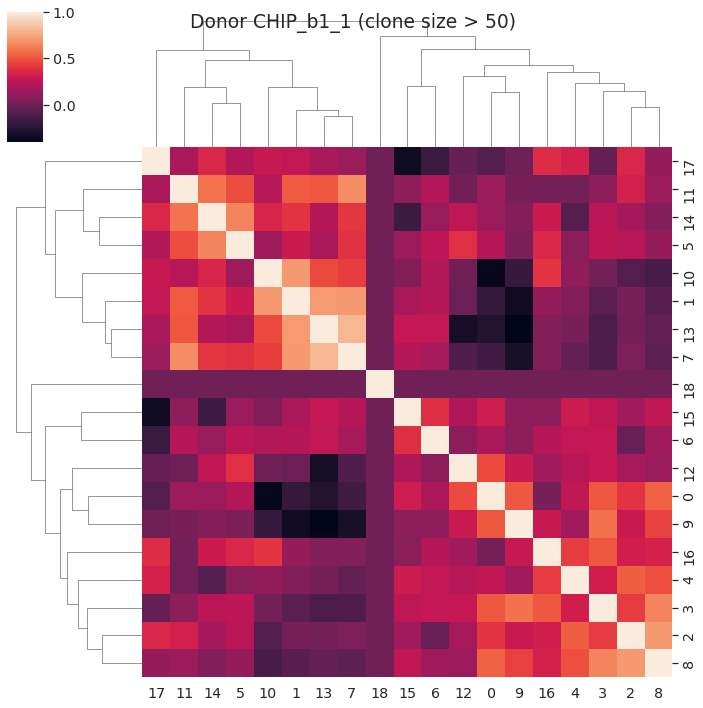

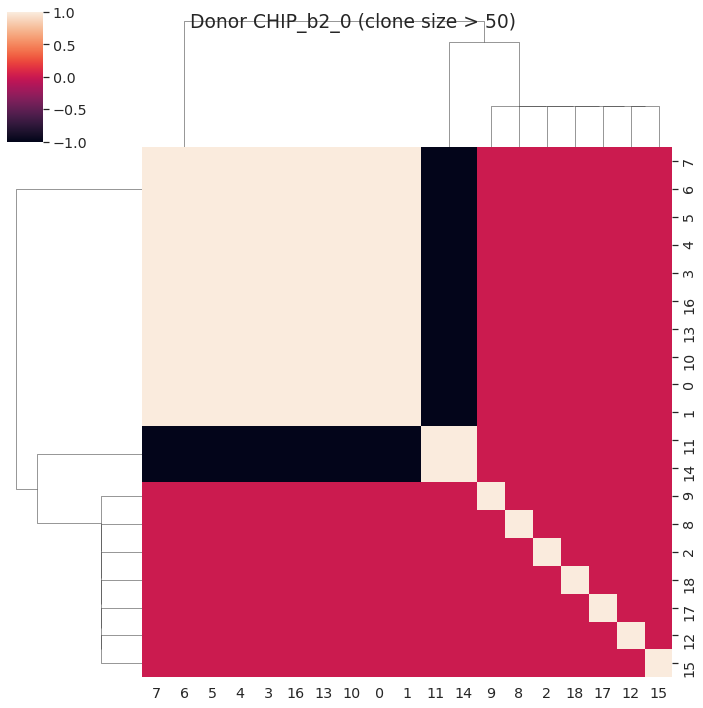

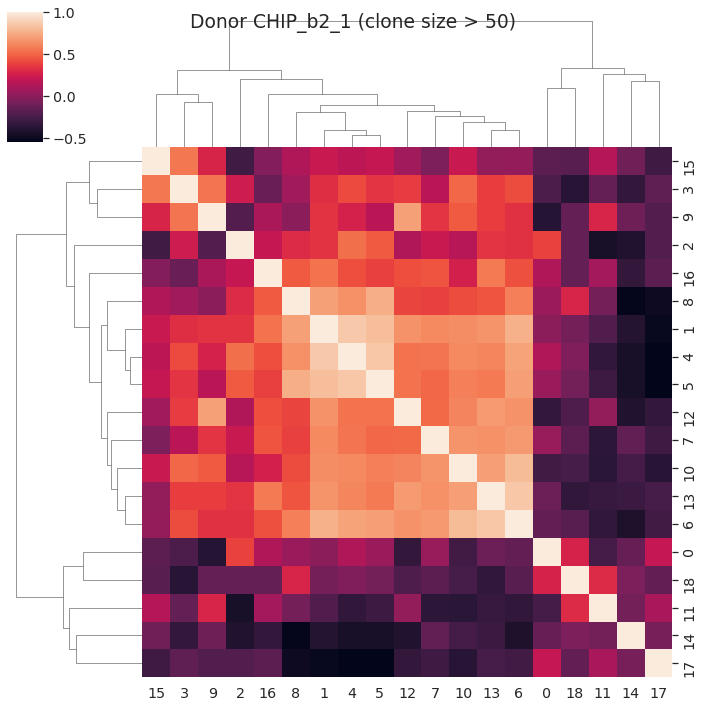

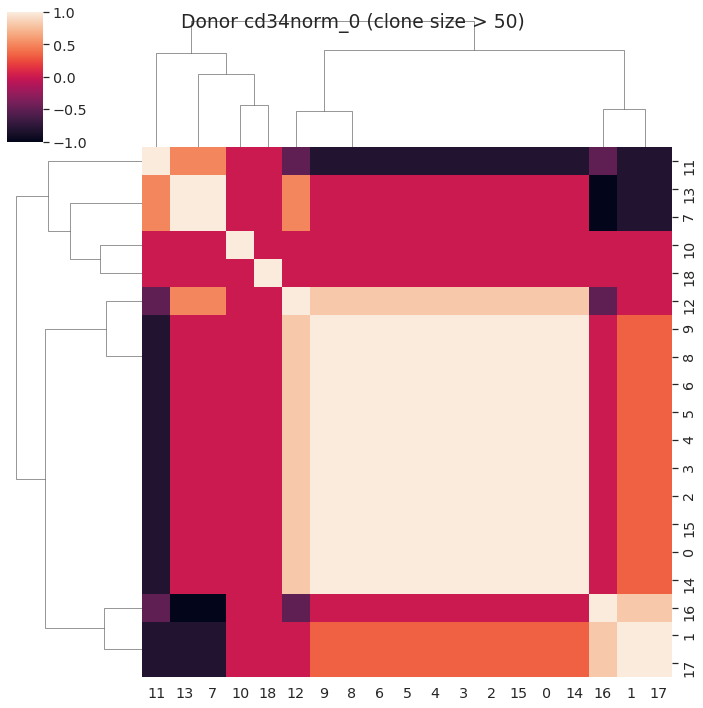

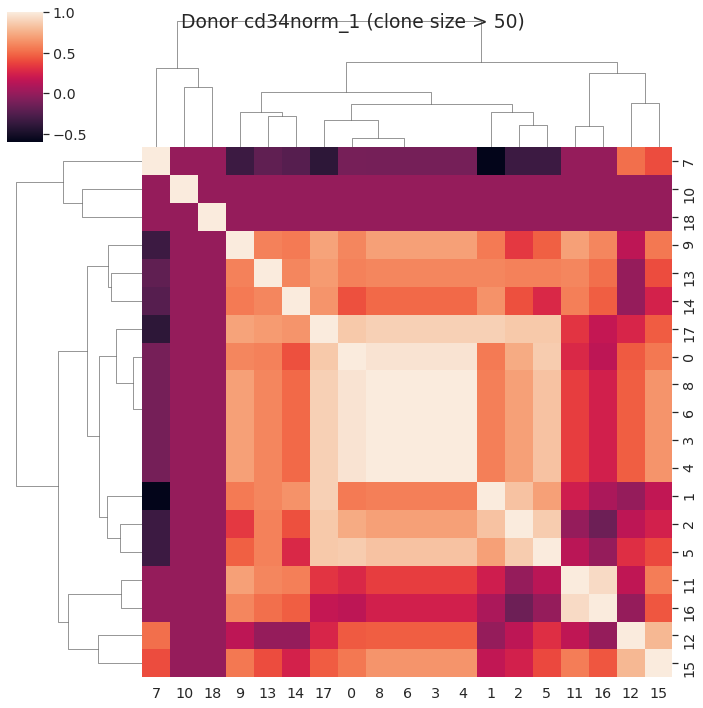

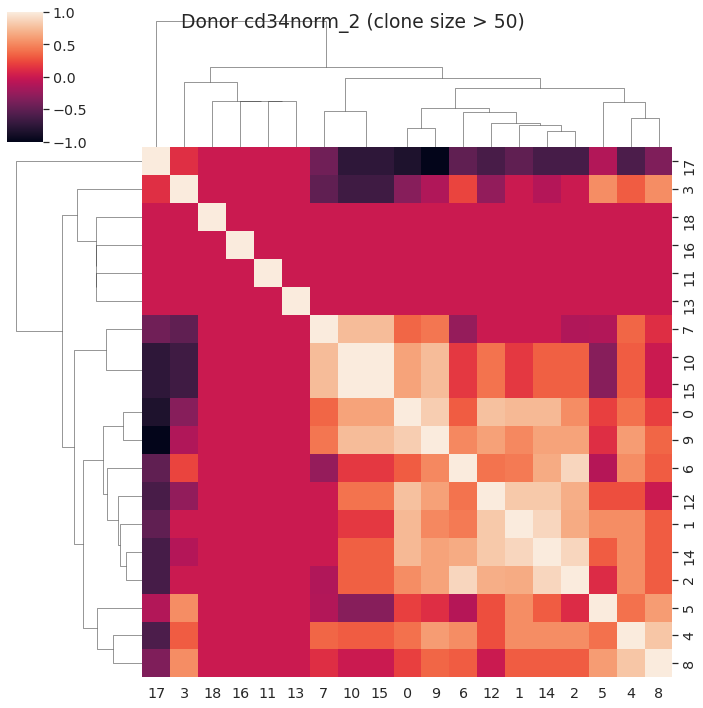

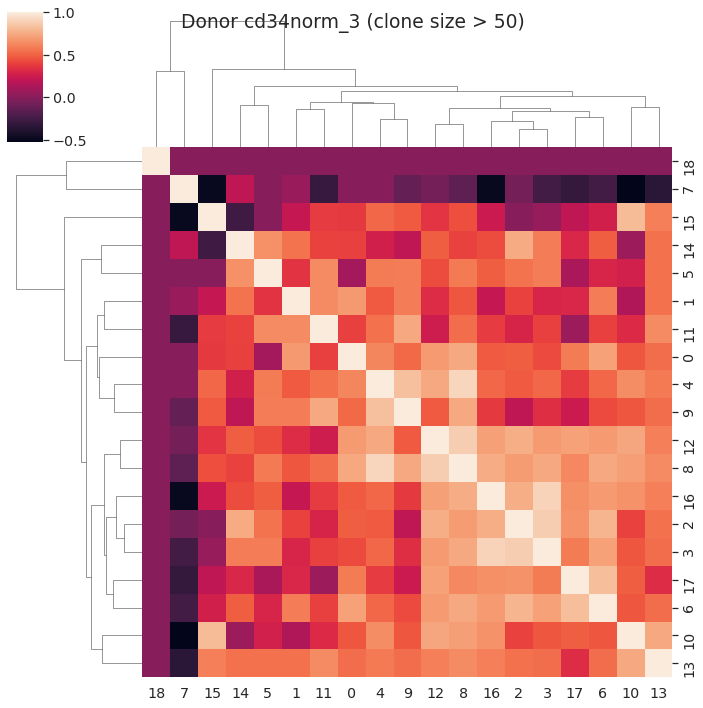

In [16]:
for don, val in clone_counts_df.groupby("donor"):
    tmp = keep_top_clones(val, min_cell=50)
    #corr_df = np.log2(1+tmp.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
    corr_df = get_corr(tmp, corr_method).fillna(0)
    corr_df

    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} (clone size > 50)")

In [ ]:
# ## Separate donors, no min_cell

# for don, val in clone_counts_df.groupby("donor"):
#     tmp = keep_top_clones(val, min_cell=0)
#     #corr_df = np.log2(1+val.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
#     corr_df = get_corr(val, corr_method)
#     sns.clustermap(corr_df)
#     plt.suptitle(f"Donor {don} (all clones)")

### d) Normalize per donor, run donors together and separately

In [17]:
filt_clone_counts = keep_top_clones(clone_counts, min_cell=min_cell)
clone_norm = filt_clone_counts.copy()

#clone_sums = clone_counts.groupby("name").sum()["ncells"]

clone_norm["ncells"] = np.log2(1+clone_norm["ncells"])
clone_sums = filt_clone_counts.groupby(["donor"]).sum()["ncells"]

clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["donor"])] , axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor", "nuclear_clusters"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
clone_norm_combined


,donor,nuclear_clusters,ncells
name,,,
CHIP_a1_1_10,CHIP_a1_1,1,0.221462
CHIP_a1_1_9,CHIP_a1_1,6,0.187157
CHIP_a1_4_0,CHIP_a1_4,6,0.025629
CHIP_a1_4_3,CHIP_a1_4,10,0.024839
CHIP_a1_4_0,CHIP_a1_4,3,0.023491
...,...,...,...
CHIP_b1_0_26,CHIP_b1_0,8,0.001223
CHIP_b1_0_26,CHIP_b1_0,3,0.001223
CHIP_b1_0_26,CHIP_b1_0,2,0.001223


In [18]:
corr_df.loc[(~corr_df.isnull().all(axis=1)),(~corr_df.isnull().all())]


,0,1,10,11,12,13,14,15,16,17,18,2,3,4,5,6,7,8,9
0,1.000000,0.683130,0.460566,0.394405,0.688033,0.534522,0.390360,0.370479,0.476331,0.583212,0.0,0.487950,0.428571,0.617213,0.097590,0.714286,0.000000,0.732467,0.523810
1,0.683130,1.000000,0.134840,0.635085,0.325396,0.547723,0.550000,0.216930,0.216930,0.298807,0.0,0.400000,0.292770,0.474342,0.350000,0.585540,0.064550,0.461880,0.585540
10,0.460566,0.134840,1.000000,0.311400,0.731272,0.738549,0.067420,0.804400,0.658145,0.483494,0.0,0.404520,0.460566,0.639602,0.269680,0.460566,-0.522233,0.700649,0.460566
11,0.394405,0.635085,0.311400,1.000000,0.250490,0.632456,0.404145,0.375735,0.375735,0.069007,0.0,0.288675,0.394405,0.547723,0.635085,0.394405,-0.298142,0.533333,0.732467
12,0.688033,0.325396,0.731272,0.250490,1.000000,0.594089,0.488094,0.352941,0.705882,0.713024,0.0,0.759257,0.688033,0.743161,0.433861,0.688033,-0.070014,0.876714,0.476331
13,0.534522,0.547723,0.738549,0.632456,0.594089,1.000000,0.547723,0.594089,0.594089,0.327327,0.0,0.547723,0.534522,0.577350,0.547723,0.534522,-0.353553,0.632456,0.534522
14,0.390360,0.550000,0.067420,0.404145,0.488094,0.547723,1.000000,-0.271163,0.433861,0.298807,0.0,0.750000,0.585540,0.263523,0.650000,0.487950,0.193649,0.404145,0.195180
15,0.370479,0.216930,0.804400,0.375735,0.352941,0.594089,-0.271163,1.000000,0.235294,0.194461,0.0,0.000000,0.052926,0.514496,0.000000,0.264628,-0.490098,0.438357,0.476331
16,0.476331,0.216930,0.658145,0.375735,0.705882,0.594089,0.433861,0.235294,1.000000,0.648204,0.0,0.759257,0.899735,0.514496,0.488094,0.688033,-0.490098,0.751469,0.370479
17,0.583212,0.298807,0.483494,0.069007,0.713024,0.327327,0.298807,0.194461,0.648204,1.000000,0.0,0.657376,0.583212,0.377964,0.119523,0.816497,-0.308607,0.621059,0.233285


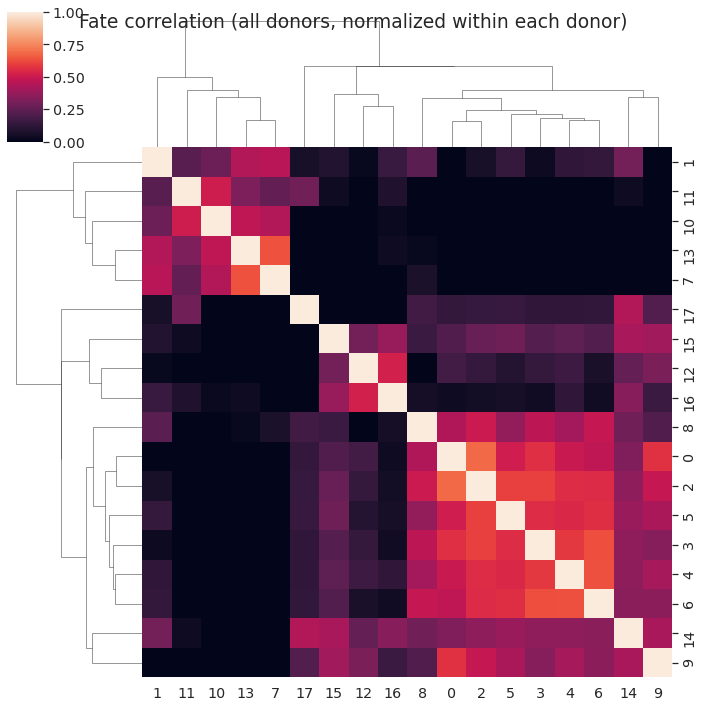

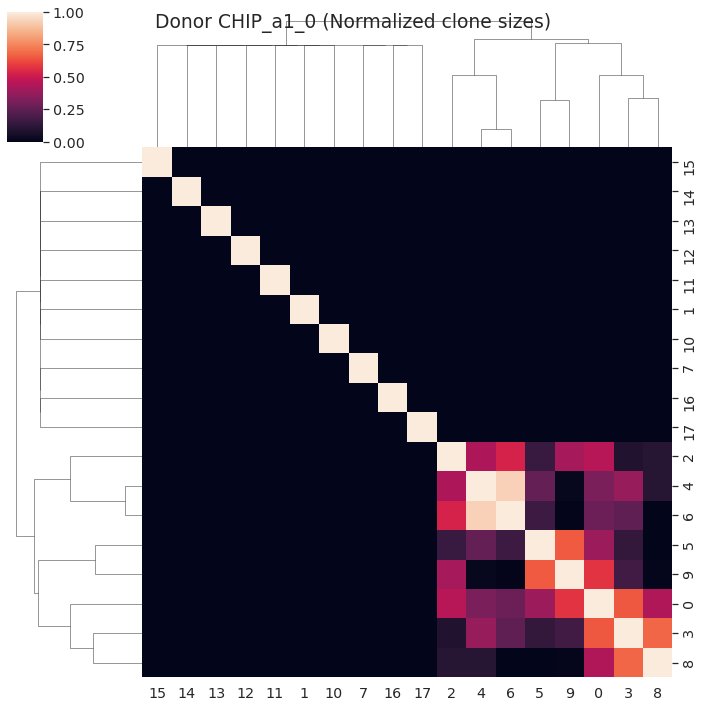

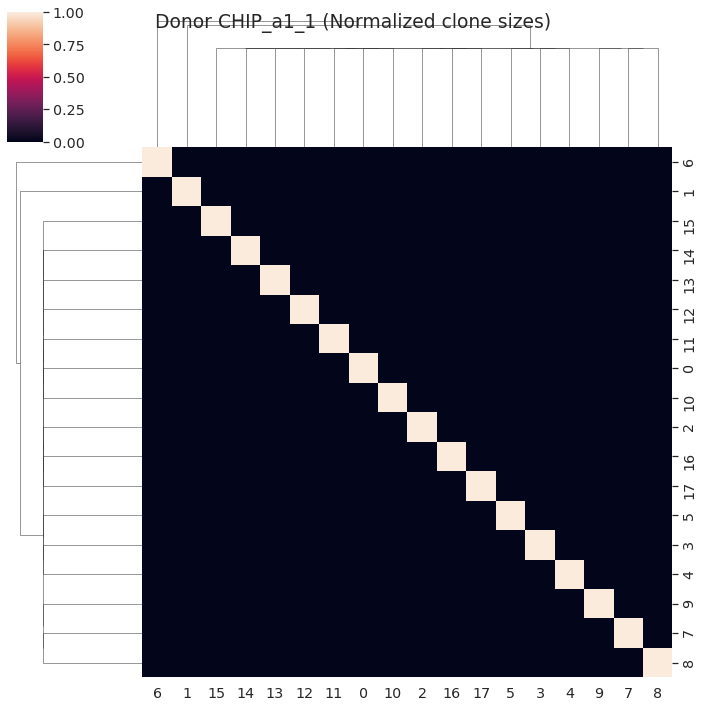

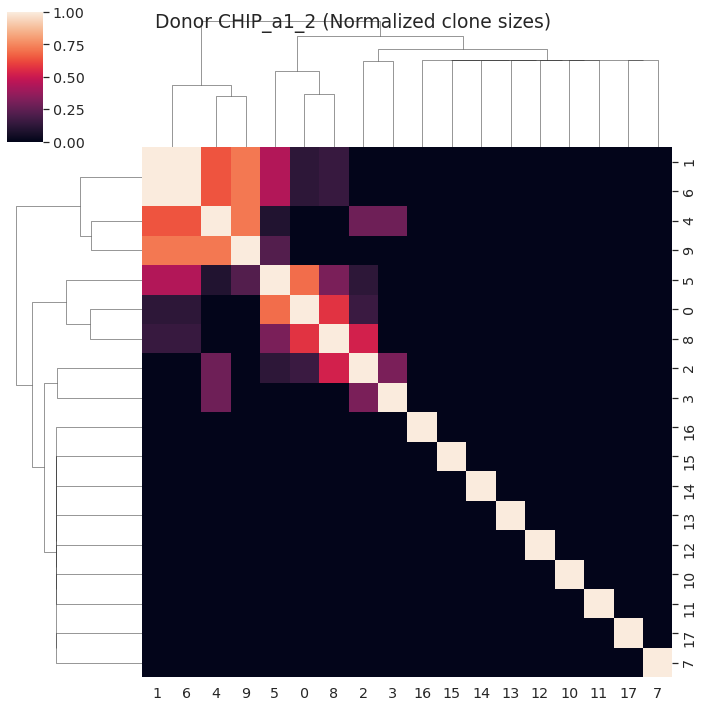

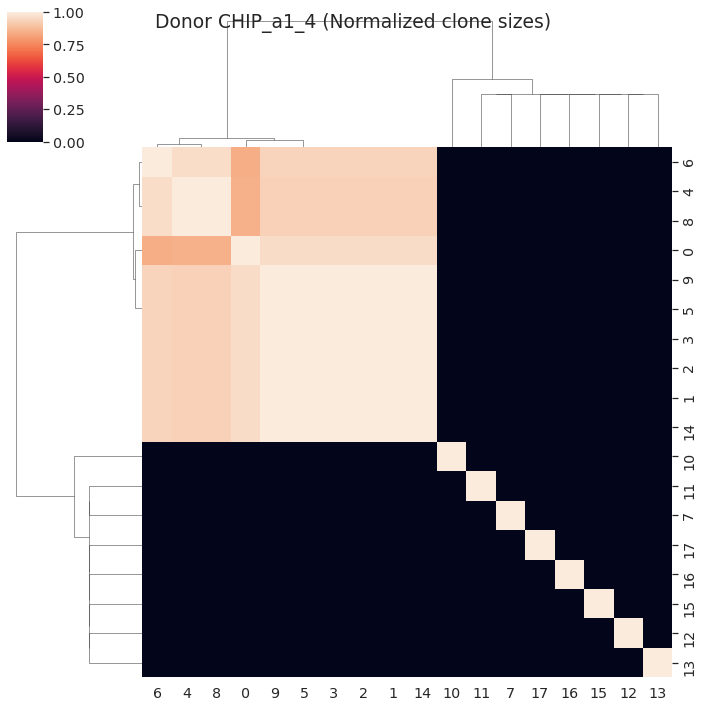

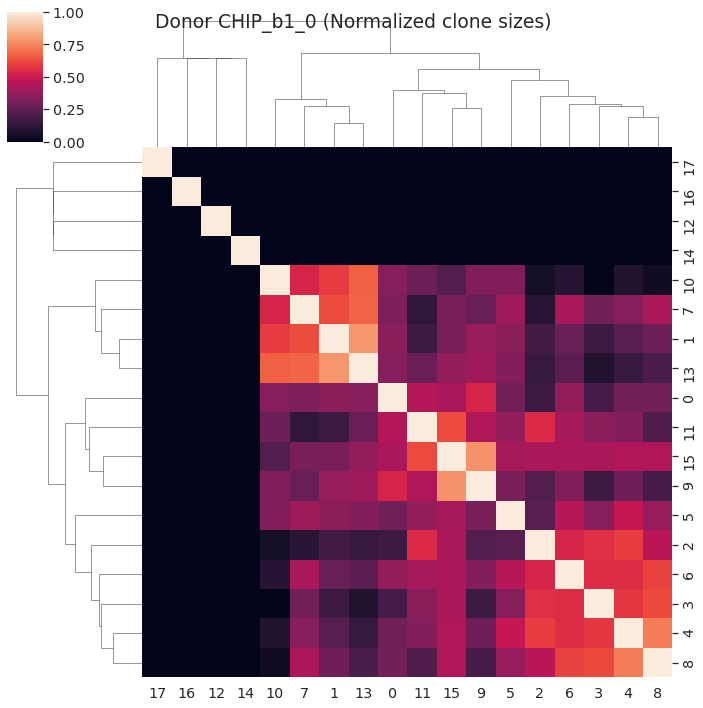

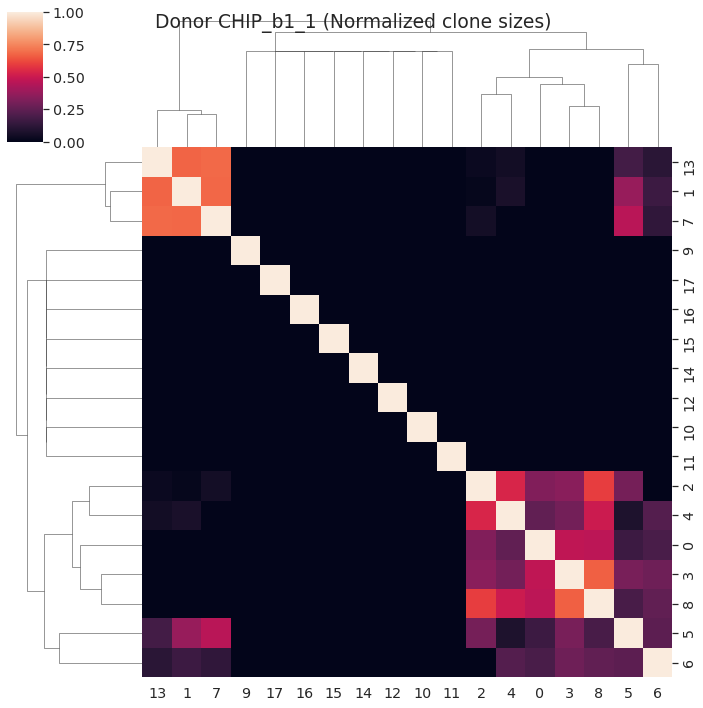

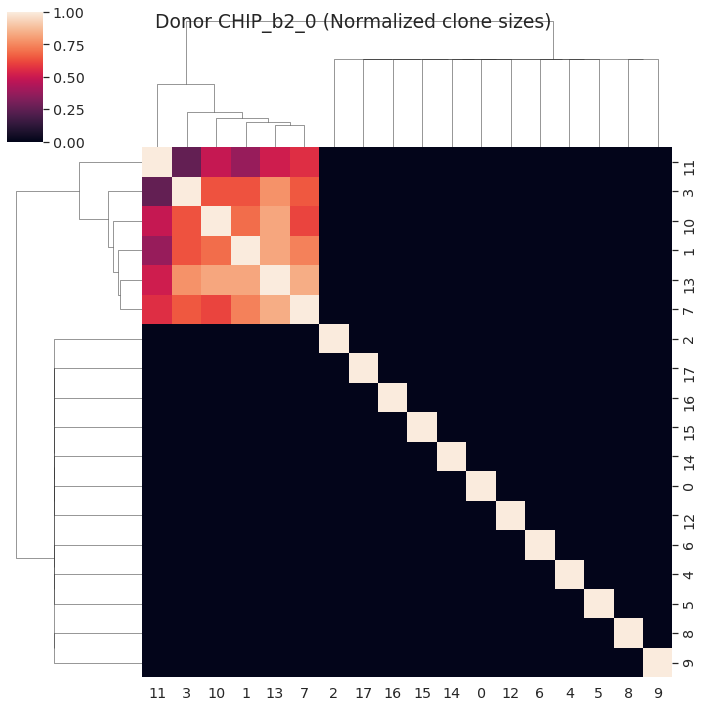

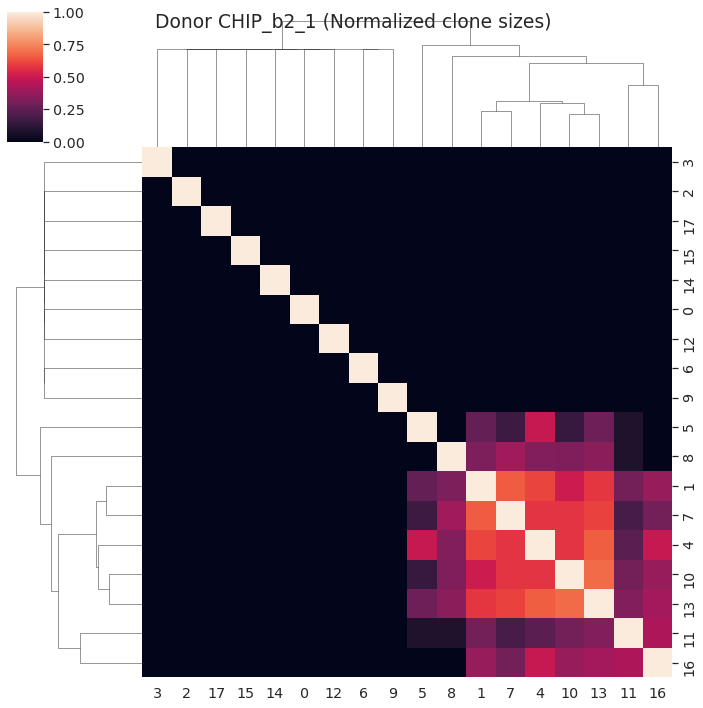

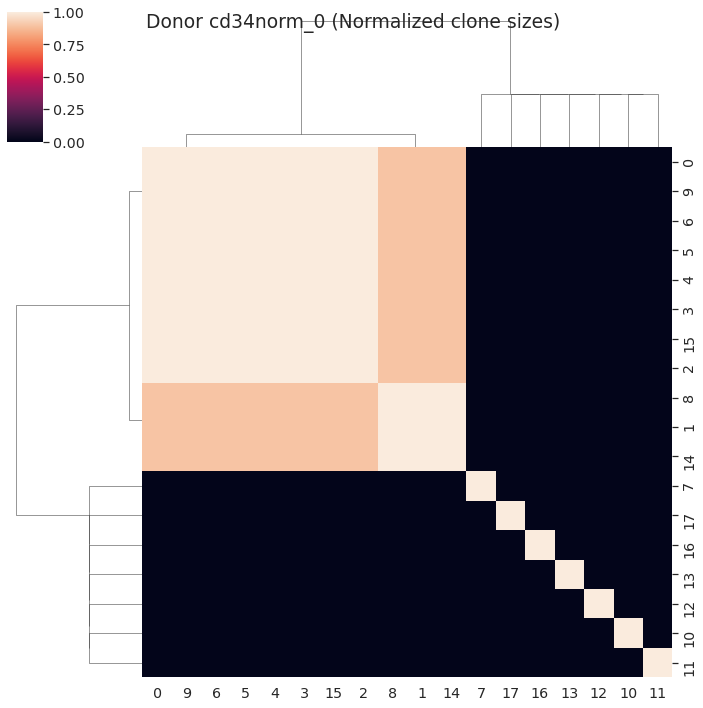

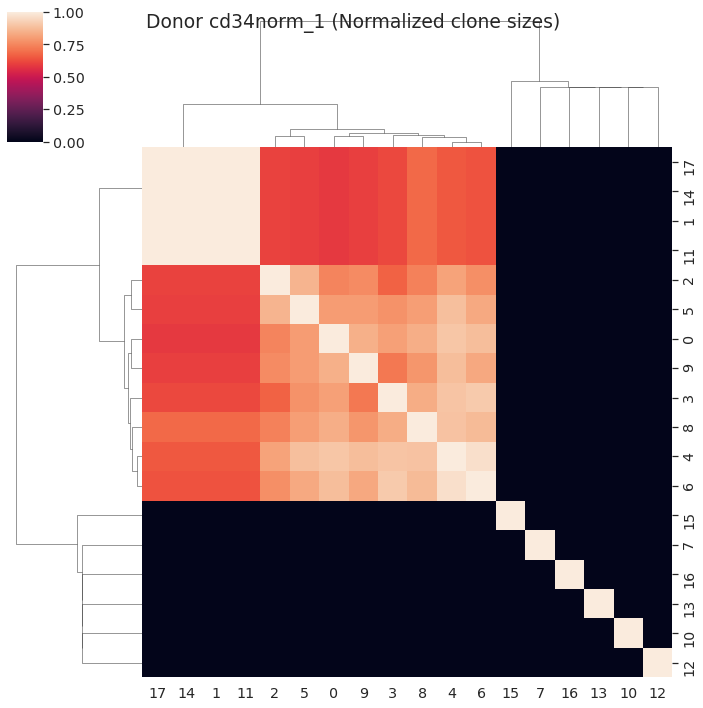

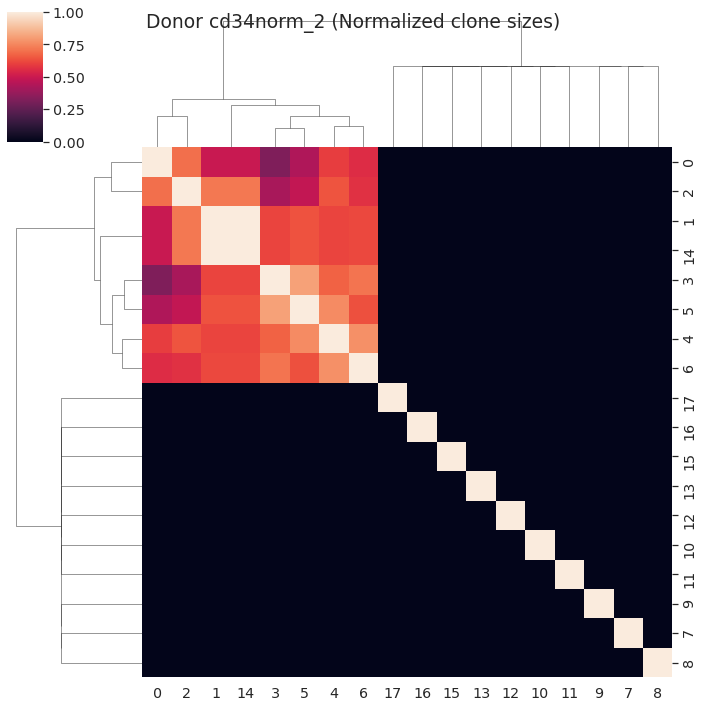

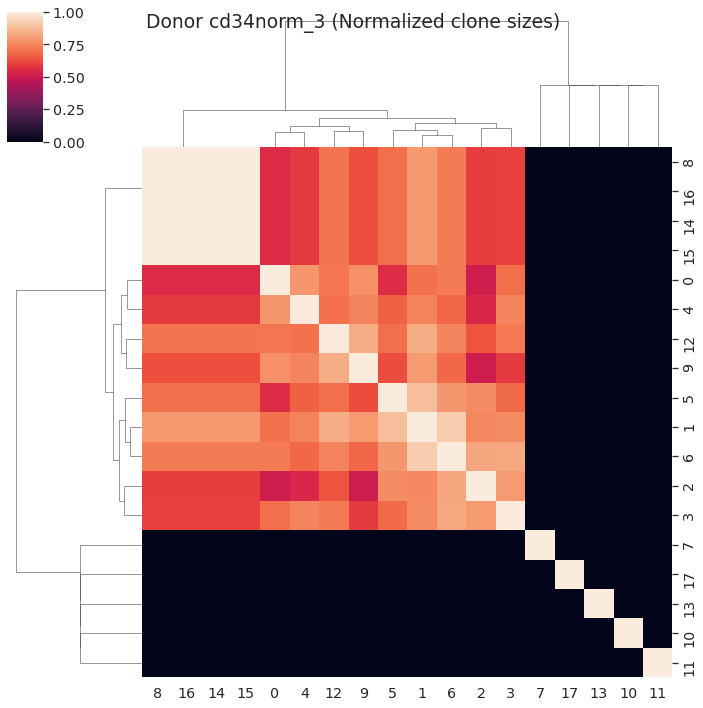

In [19]:

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1, args=(clone_norm,))),axis=1).fillna(0)
#norm_corr_df = clone_norm_df.drop(["ncells", "donor"],axis=1).corr(method="spearman")

norm_corr_df = get_corr(clone_norm_df, corr_method)

sns.clustermap(norm_corr_df.loc[(~norm_corr_df.isnull().all(axis=1)),(~norm_corr_df.isnull().all())], vmin=0, vmax=1)
plt.suptitle("Fate correlation (all donors, normalized within each donor)")
hs(join(outdir, "norm_allDonors.png"), to_pdf=True)

for don, val in clone_norm_df.groupby("donor"):
    #corr_df = val.drop(["ncells", "donor"],axis=1).corr(method="spearman")
    corr_df = get_corr(val, corr_method)
    sns.clustermap(corr_df.loc[(~corr_df.isnull().all(axis=1)),(~corr_df.isnull().all())].fillna(0), vmin=0, vmax=1)
    plt.suptitle(f"Donor {don} (Normalized clone sizes)")

    0   1
0   0  10
1   0   2
2   1   6
3  10   0
4  10   2
    0  1
0   0  2
1  13  7
2   2  0
3   2  3
4   3  2


[                     0         1                      comp
 name                                                      
 CHIP_a1_1_10  0.000000  0.000000  0__2 (kendall_b r=0.687)
 CHIP_a1_1_9   0.000000  0.000000  0__2 (kendall_b r=0.687)
 CHIP_a1_4_0   0.019092  0.021267  0__2 (kendall_b r=0.687)
 CHIP_a1_4_3   0.000000  0.000000  0__2 (kendall_b r=0.687)
 CHIP_a1_4_0   0.019092  0.021267  0__2 (kendall_b r=0.687)
 ...                ...       ...                       ...
 CHIP_b1_0_26  0.001447  0.001223  0__2 (kendall_b r=0.687)
 CHIP_b1_0_26  0.001447  0.001223  0__2 (kendall_b r=0.687)
 CHIP_b1_0_26  0.001447  0.001223  0__2 (kendall_b r=0.687)
 CHIP_b1_0_25  0.001223  0.001659  0__2 (kendall_b r=0.687)
 CHIP_b1_0_25  0.001223  0.001659  0__2 (kendall_b r=0.687)
 
 [694 rows x 3 columns],
                 0         1                       comp
 name                                                  
 CHIP_a1_1_10  0.0  0.000000  13__7 (kendall_b r=0.637)
 CHIP_a1_1_9   0.0  0.000

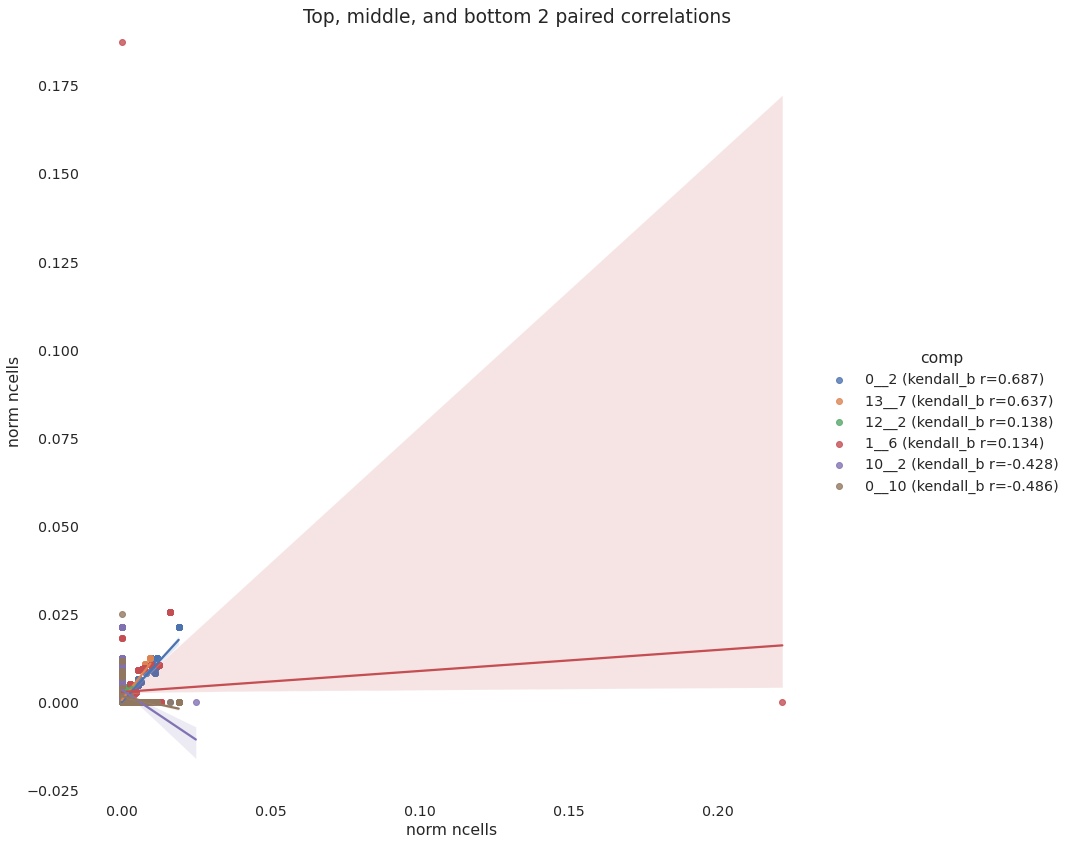

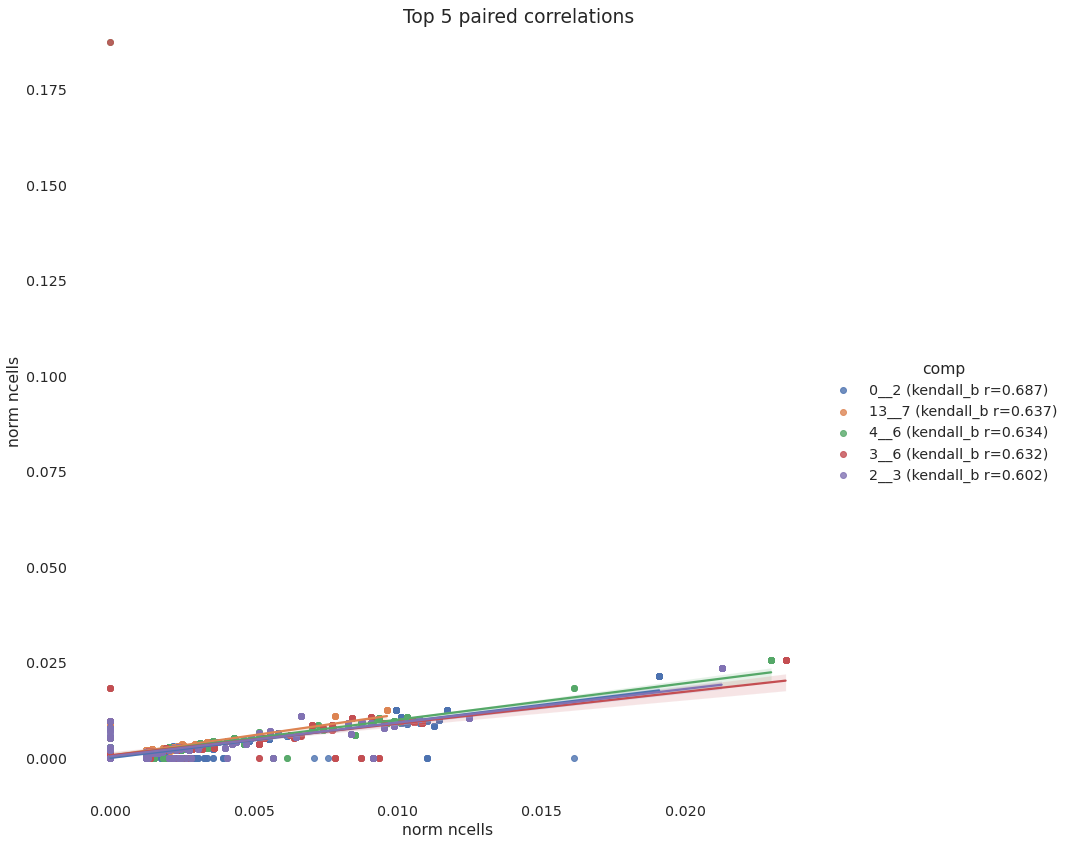

In [20]:
plot_repr_corr(clone_norm_df, norm_corr_df, label="norm ncells", out_f=join(outdir, "norm_fateCorr_scatter_allDonors.png"))

plot_repr_corr(clone_norm_df, norm_corr_df, label="norm ncells", top=True, 
               out_f=join(outdir, "top_norm_fateCorr_scatter_allDonors.png"))

---

## e) Separate clones into conditions and run for combined and separate
(no min_cell)

In [20]:
cl_cond_counts_df = se_cells_meta.groupby(["nuclear_clusters", "condition", "donor", "name"]).size().reset_index().rename({0:"ncells"}, axis=1)
cl_cond_counts_df
wide_cl_cond_counts_df = cl_cond_counts_df.reset_index().pivot(columns="nuclear_clusters", index=["condition", "donor",
                                                                                       "name"], values="ncells").fillna(0)
wide_cl_cond_counts_df

nuclear_clusters      B-cell lineage  Basophil;Eosinophil  Classical Monocyte  \
condition donor name                                                            
Flt3l     0     0_0              5.0                  7.0                10.0   
                0_1              1.0                  1.0                 5.0   
                0_10             0.0                  0.0                 1.0   
                0_11             2.0                  2.0                 1.0   
                0_12             1.0                  0.0                 1.0   
...                              ...                  ...                 ...   
Input     1     1_5              3.0                  3.0                 1.0   
                1_6              5.0                  3.0                 1.0   
                1_7              6.0                  2.0                 0.0   
                1_8              2.0                  3.0                 0.0   
                1_9              3.0                  1.0                 0.0   

nuclear_clusters      Erythroid lineage  HPSC 1  HPSC 2  HSPC 3  HSPC 4  \
condition donor name                                                      
Flt3l     0     0_0                 0.0     0.0     0.0     5.0     0.0   
                0_1                 0.0     0.0     0.0     2.0     0.0   
                0_10                0.0     0.0     0.0     1.0     0.0   
                0_11                0.0     0.0     0.0     0.0     0.0   
                0_12                0.0     0.0     0.0     0.0     0.0   
...                                 ...     ...     ...     ...     ...   
Input     1     1_5                23.0    27.0    71.0    26.0     1.0   
                1_6                19.0    33.0    49.0    17.0     0.0   
                1_7                17.0    28.0    56.0    18.0     0.0   
                1_8                20.0    33.0    51.0    16.0     1.0   
                1_9                11.0    33.0    49.0    17.0     0.0   

nuclear_clusters      Neutrophil  Non-classical monocyte  pDC  pre-B cells  
condition donor name                                                        
Flt3l     0     0_0         14.0                     0.0  0.0          0.0  
                0_1          4.0                     0.0  0.0          0.0  
                0_10         4.0                     0.0  0.0          0.0  
                0_11         1.0                     0.0  0.0          0.0  
                0_12         4.0                     0.0  0.0          0.0  
...                          ...                     ...  ...          ...  
Input     1     1_5          2.0                     0.0  4.0          0.0  
                1_6          4.0                     1.0  2.0          2.0  
                1_7          2.0                     1.0  3.0          2.0  
                1_8          3.0                     0.0  1.0          0.0  
                1_9          3.0                     1.0  1.0          1.0  

[116 rows x 12 columns]

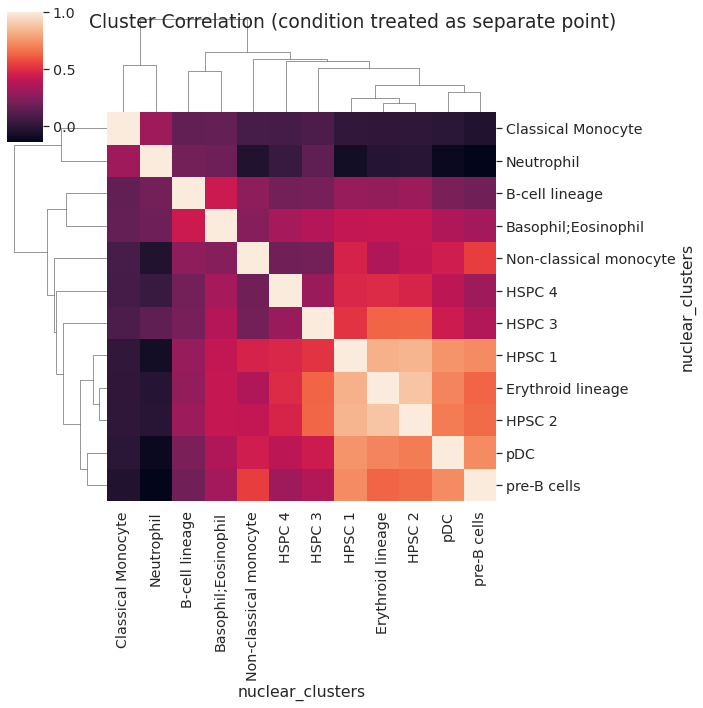

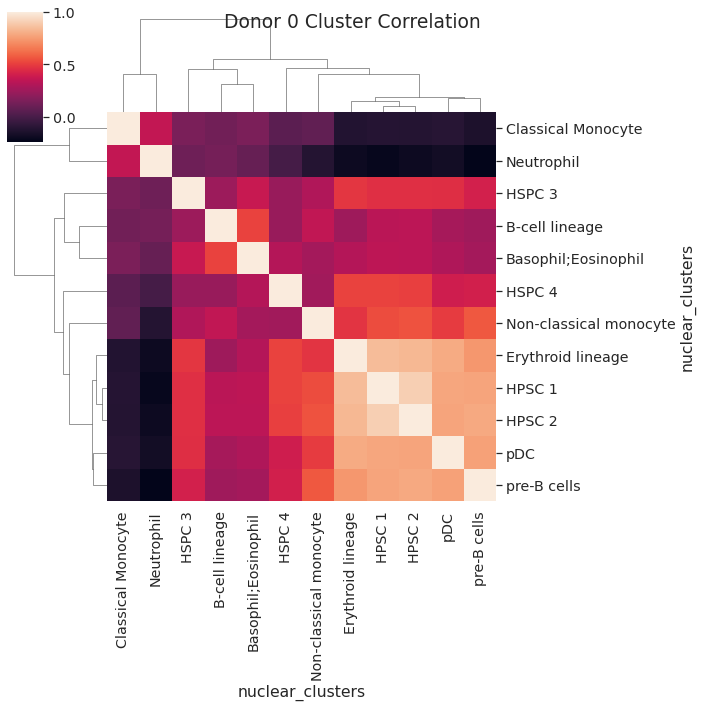

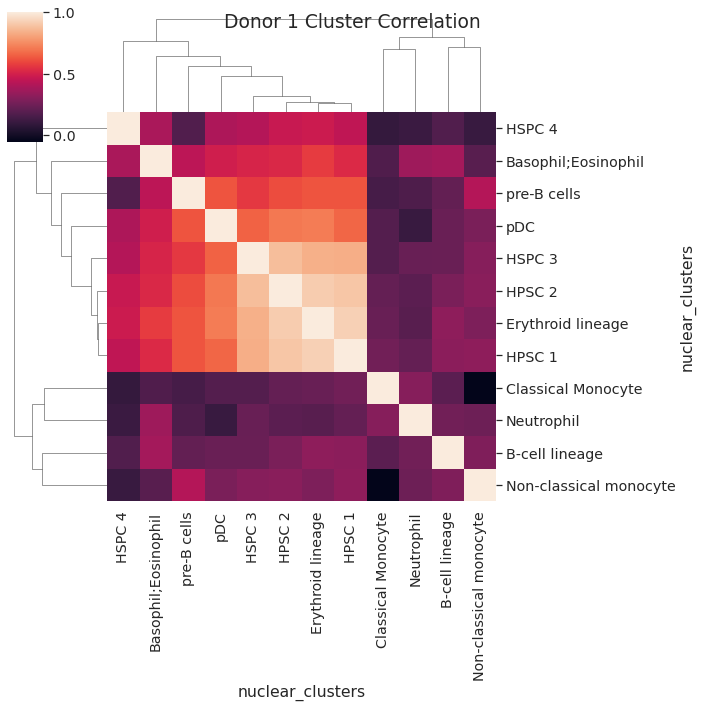

In [21]:
log2_clone_counts_df = wide_cl_cond_counts_df.copy()
log2_clone_counts_df[hue_order] = np.log2(1+log2_clone_counts_df[hue_order])

#cond_corr_df = log2_clone_counts_df.corr(method="spearman")
cond_corr_df = get_corr(log2_clone_counts_df, corr_method)


cond_corr_df
sns.clustermap(cond_corr_df)
hs(join(outdir, "fateCorr_sepCond_allDonors.png"), to_pdf=True)

plt.suptitle("Cluster Correlation (condition treated as separate point)")
for don, val in log2_clone_counts_df.reset_index().groupby("donor"):
    if corr_method == "spearman":
        corr_df = val.drop(["condition", "donor", "name"],axis=1).corr(method="spearman")
    else:
        corr_df = val.drop(["condition", "donor", "name"],axis=1).corr(method=kendalltau_b)
    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} Cluster Correlation")

## Get top, middle, and bottom 2 correlations - Conditions treated separately

[nuclear_clusters             0         1  \
 condition donor name                       
 Flt3l     0     0_0   0.000000  0.000000   
                 0_1   0.000000  0.000000   
                 0_10  0.000000  0.000000   
                 0_11  0.000000  0.000000   
                 0_12  0.000000  0.000000   
 ...                        ...       ...   
 Input     1     1_5   4.584963  6.169925   
                 1_6   4.321928  5.643856   
                 1_7   4.169925  5.832890   
                 1_8   4.392317  5.700440   
                 1_9   3.584963  5.643856   
 
 nuclear_clusters                                               comp  
 condition donor name                                                 
 Flt3l     0     0_0   Erythroid lineage__HPSC 2 (kendall_b r=0.883)  
                 0_1   Erythroid lineage__HPSC 2 (kendall_b r=0.883)  
                 0_10  Erythroid lineage__HPSC 2 (kendall_b r=0.883)  
                 0_11  Erythroid lineage__HPSC 2 (kendall_

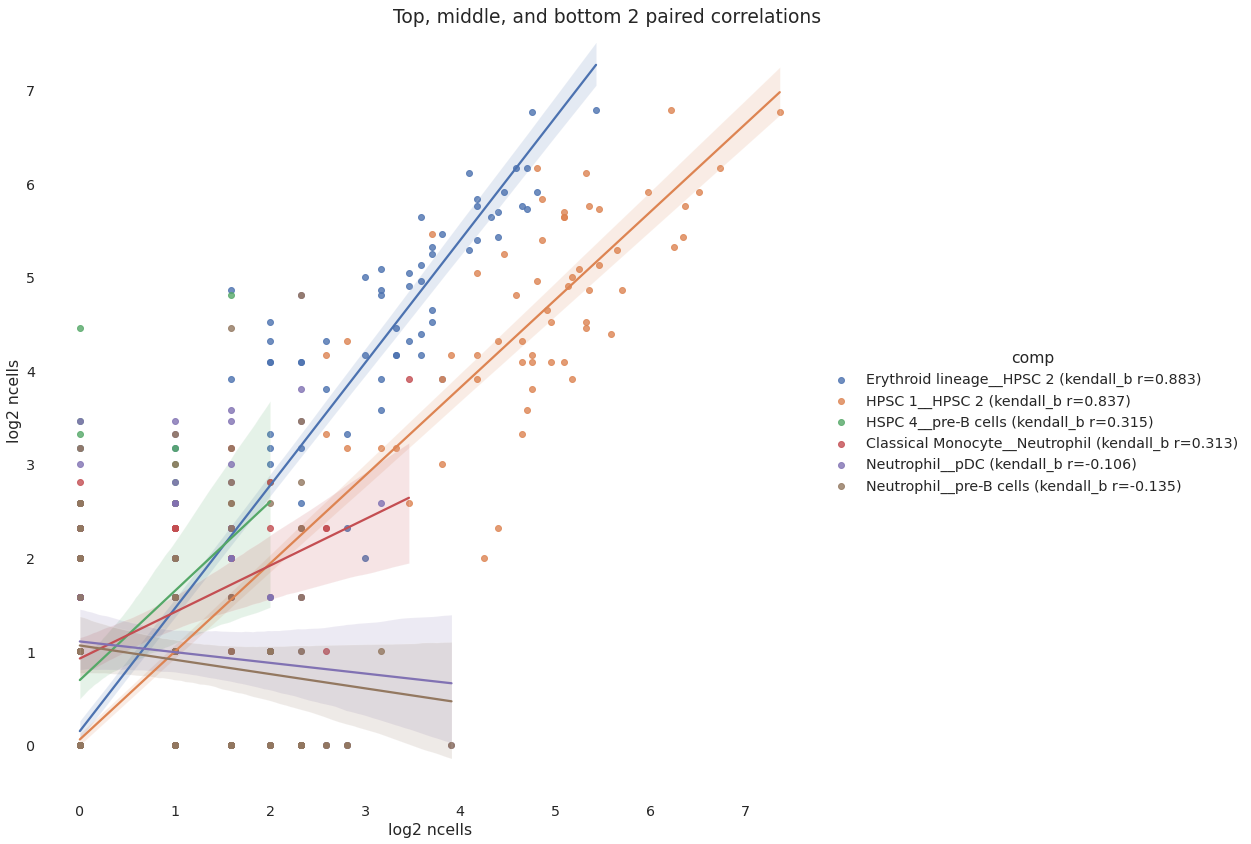

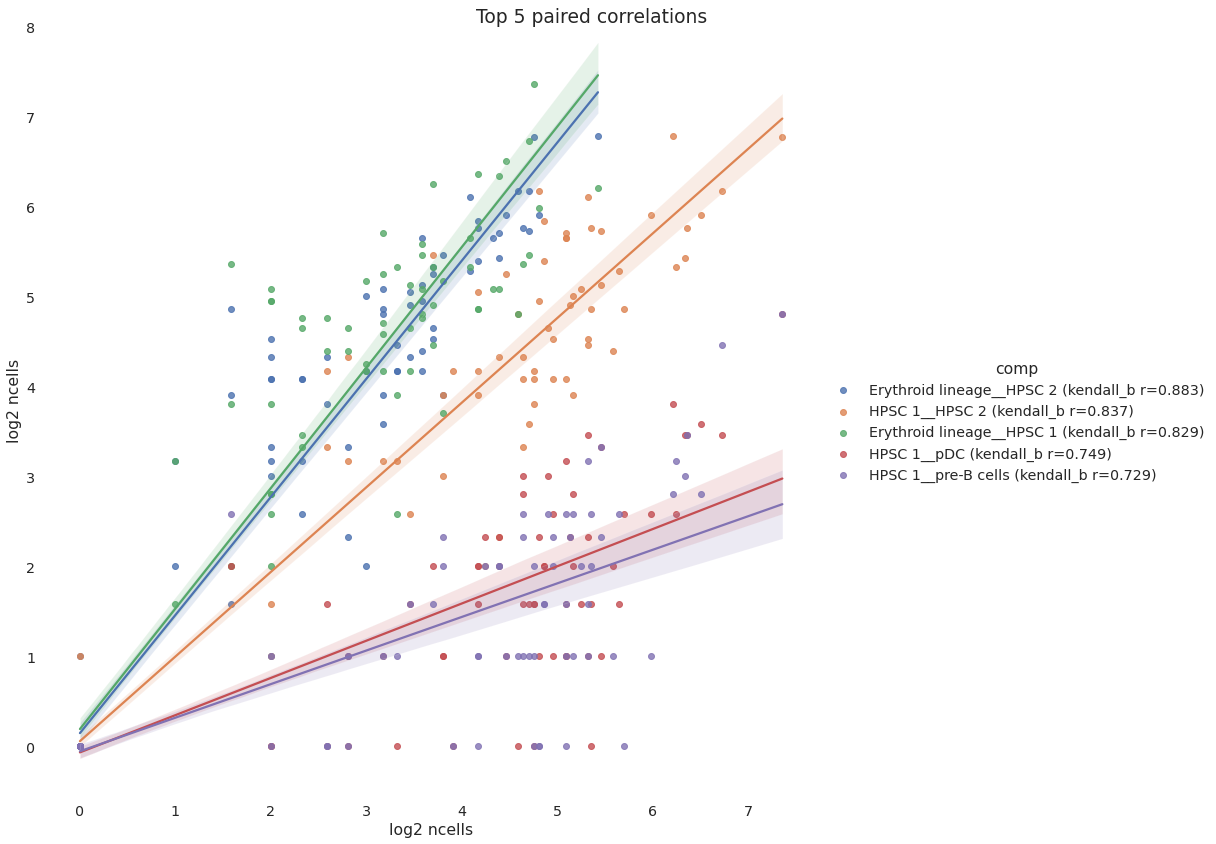

In [22]:
plot_repr_corr(log2_clone_counts_df, cond_corr_df, label="log2 ncells", 
               out_f=join(outdir, "fateCorr_scatter_sepCond_allDonors.png"))

plot_repr_corr(log2_clone_counts_df, cond_corr_df, label="log2 ncells", top=True,
               out_f=join(outdir, "top_fateCorr_scatter_sepCond_allDonors.png"))



## Pairplot of clusters

In [23]:
#g = sns.pairplot(log2_clone_counts_df.reset_index().drop(["name","donor"], axis=1), hue="condition", height=4)

---

---

---

In [24]:
outdir

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/fate_correlation/minC5_corr.Kendall.b/'